In [2]:
import os
import sys 
sys.path.remove('/Users/karolinagrzeszkiewicz/robustness-tests/locomotion/tests/robustness_tests')
sys.path.append('/Users/karolinagrzeszkiewicz/locomotion')
import locomotion 
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm

In [3]:
FR_test_high = pd.read_csv("/Users/karolinagrzeszkiewicz/robustness-tests/locomotion/tests/robustness_tests/results/FR_test_higher/Results_BDD.csv")
FR_test_low = pd.read_csv("/Users/karolinagrzeszkiewicz/robustness-tests/locomotion/tests/robustness_tests/results/FR_test_lower/Results_BDD.csv")
density_test_high = pd.read_csv("/Users/karolinagrzeszkiewicz/robustness-tests/locomotion/tests/robustness_tests/results/density_test_higher/Results_BDD.csv") 
density_test_low = pd.read_csv("/Users/karolinagrzeszkiewicz/robustness-tests/locomotion/tests/robustness_tests/results/density_test_lower/Results_BDD.csv")

In [4]:
#some data cleaning
FR_high_sequence = []
for i in range(24, 120, 2):
    FR_high_sequence.append(i)
    
FR_test_high.columns = FR_high_sequence
FR_test_high['curve_no'] = list(range(0,50))
FR_test_high = FR_test_high.melt(id_vars=["curve_no"],var_name= "FR", value_name= "Value")
FR_test_high.sort_values(by=['curve_no','FR'],inplace=True)

FR_low_sequence = []
for i in range(6, 24, 1):
    FR_low_sequence.append(i)
    
FR_test_low.columns = FR_low_sequence
FR_test_low['curve_no'] = list(range(0,50))
FR_test_low = FR_test_low.melt(id_vars=["curve_no"],var_name= "FR", value_name= "Value")
FR_test_low.sort_values(by=['curve_no','FR'],inplace=True)


In [5]:
density_high_sequence = [2.368992797258969, 3.2898658440840056, 5.473812199530617, 4.574146602662274, 
                         2.6141573284228126, 5.96774414486297, 4.919487032372022, 5.477229681809226, 
                         6.742887510799092, 2.345219811091552, 5.731522408977321, 3.993338537545986, 
                         7.889034959596039, 7.007766085735554, 4.217502998657783, 7.605826873681228,
                         2.0942184770464873, 2.542377644820858, 6.462880785207142, 2.549370957944128, 
                         7.137798629767561, 4.795589643398923, 6.045053445122158, 4.906692977326488, 
                         7.598186263992971, 4.833726585289512, 3.1708362804940107, 7.161979381629832,
                         5.306152816775535, 2.0872776459143214, 3.635836263604438, 6.165319987583199, 
                         2.0038089224212623, 7.533163519018309, 4.606802991494709, 5.123603390379272, 
                         7.976843833741872, 4.88059504692373, 6.726006046753367, 6.478311752285514,
                         7.5641876376455235, 3.709645474493994, 3.971763829555001, 2.8308933469802953, 
                         2.092628573464515, 2.344690794845139, 7.672325316009733, 3.905226532844937, 
                         3.444615738840314, 7.912618974332681]

#density values copied from the Results_variables.json file 
    
density_test_high.columns = density_high_sequence
density_test_high['curve_no'] = list(range(0,50))
density_test_high = density_test_high.melt(id_vars=["curve_no"],var_name= "density", value_name= "Value")
density_test_high.sort_values(by=['curve_no','density'],inplace=True)

density_low_sequence = [1.0906912451058035, 1.268479888157353, 1.1679789287915743, 1.6633547378982025, 
                        1.7321744370406937, 1.122045331110551, 1.2272947823777238, 0.8255097659351933, 
                        1.2916626185228084, 1.9371499257510707, 1.3530284234527397, 1.2013791915770669,
                        1.0328891792633028, 1.719768238512047, 0.7260818498032382, 1.2956324976020566, 
                        0.8138626893973424, 1.083666675641727, 0.5872537420307997, 1.6176015180698782, 
                        1.5944544810207444, 1.4769154852446387, 1.7144448832683261, 1.1889047509079453, 
                        1.4975589647608254, 1.7472224459326873, 0.8885039498009015, 0.5540597093138122, 
                        1.7885775630922738, 1.7963759381823556, 1.112417410993694, 1.1035645550893247, 
                        1.6817017739193096, 1.960848387207407, 1.4710519729614413, 0.7679457658315942, 
                        1.422682375926864, 1.9331329008370457, 1.1262315521264585, 1.303818727304506, 
                        1.9349910658067457, 0.9212269099361686, 1.631284465923661, 1.2742029423793777, 
                        1.1645463456276386, 1.1776386616022918, 0.9996399216968882, 1.2382198048648845, 
                        1.1723253337564363, 1.9242555125998462]
    
density_test_low.columns = density_low_sequence
density_test_low['curve_no'] = list(range(0,50))
density_test_low = density_test_low.melt(id_vars=["curve_no"],var_name= "density", value_name= "Value")
density_test_low.sort_values(by=['curve_no','density'],inplace=True)

In [6]:
density_test = pd.concat([density_test_low, density_test_high])
FR_test = pd.concat([FR_test_low, FR_test_high])

In [7]:
#assume we're given a data frame with 3 columns: 'curve_no', 'FR'/'RES', 'Value' (BDD) 
#important: if the data frame = 2 data frames merged then rememember not to double-count values for curves with meanVAR
#even if double counting it shouln't affect the outcome (only the number of curves will be greater)

def plotBDDforVar (data_Vartest, Var, meanVar):
    n_values = data_Vartest[Var].nunique()
    n_curves = int((len(data_Vartest.Value))/n_values) 
    colors = cm.rainbow(np.linspace(0, 1, 50))
    
    if Var == "FR":
        for i, c in zip(range(n_curves), colors):
            data = data_Vartest[data_Vartest.curve_no == i]
            data_curve = data[data.FR != meanVar]
            plt.scatter('FR','Value',data= data_curve[data_curve.curve_no == i], color = c)
        plt.title("BDD Value vs. Frame Rate (frames/sec) for " + str(n_curves) + " Randomly Generated Curves")
    elif Var == "density":
        for i, c in zip(range(n_curves), colors):
            data = data_Vartest[data_Vartest.curve_no == i]
            data_curve = data[data.density != meanVar]
            plt.scatter('density','Value',data= data_curve[data_curve.curve_no == i], color = c)
        plt.title("BDD Value vs. pixel density (px/mm) for " + str(n_curves) + " Randomly Generated Curves")
    else:
        print("The variable must be either FR (Frame Rate) or RES (Resolution)")
        
        
#add label, x and y, better title
#add more error messages if applied to wrong arguments
#investigate outliers
#plot curves separately/separate curves

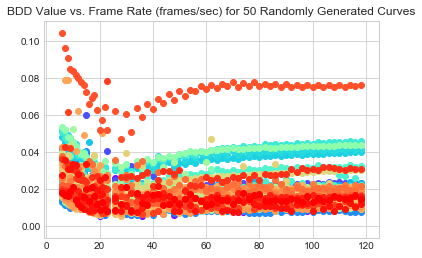

In [8]:
plotBDDforVar(FR_test, "FR", 24)

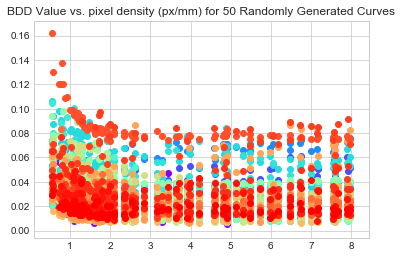

In [9]:
plotBDDforVar(density_test, "density", 2)

In [10]:
#plot curves separately 

def plotBDDforVarSep (var, meanVar, curves = range(50)):
    colors = cm.rainbow(np.linspace(0, 1, 50))
    if var == "FR":
        for i, c in zip(curves, colors):
            data = FR_test[FR_test.curve_no == i]
            data = data[data.FR != meanVar]
            label = 'curve ' + str(i)
            xlab = 'FR' + ' for '+ label
            ylab = 'BDD value' + ' for '+ label
            ax = sns.jointplot(x = 'FR', y = 'Value', data = data)
            ax.set_axis_labels(xlab, ylab, fontsize=14)
    elif var == "density":
        for i in curves:
            data = density_test[density_test.curve_no == i]
            data = data[data.density != meanVar]
            label = 'density_test_curve ' + str(i)
            xlab = 'density' + ' for '+ label
            ylab = 'BDD value' + ' for '+ label
            ax = sns.jointplot(x='density',y='Value', data= data)
            ax.set_axis_labels(xlab, ylab, fontsize=14)
    else:
        print("There is no such variable as " + var)
        
    


In [11]:
#Find outliers for FR
FR_test[FR_test.Value > 0.06]
FR_outlier_curves = FR_test.curve_no[FR_test.Value > 0.06]
FR_outlier_curves.unique()
#curve_no 44 is an outlier

array([ 5, 38, 44, 45])

In [25]:
#density
#Find outliers for FR
density_test[density_test.Value > 0.06]
density_outlier_curves = density_test.curve_no[density_test.Value > 0.12]
density_outlier_curves.unique()
#curve_no 44 is an outlier

array([44])

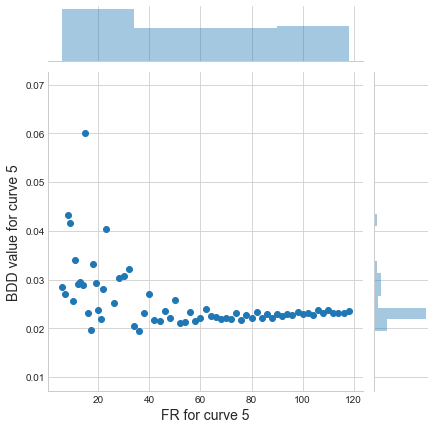

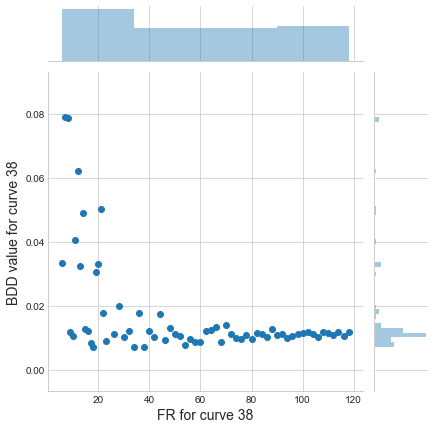

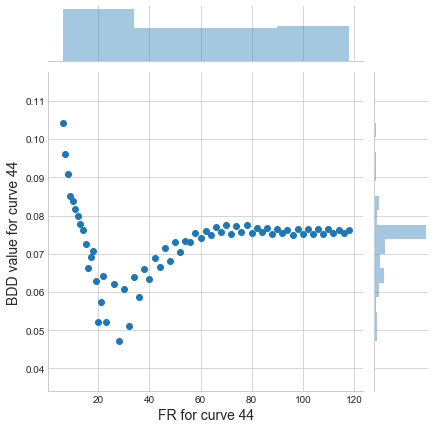

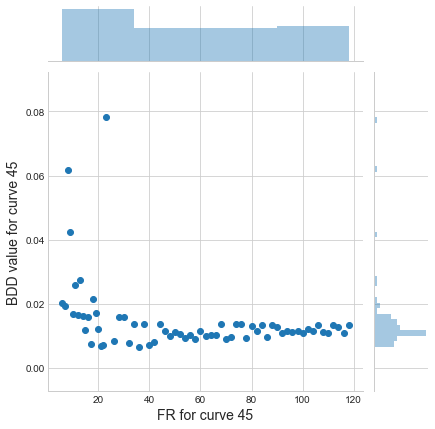

In [12]:
plotBDDforVarSep("FR", 24, [ 5, 38, 44, 45])
#curve_no 44 is an outlier curve with BDD mostly in [0.07,0.11]

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1676: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


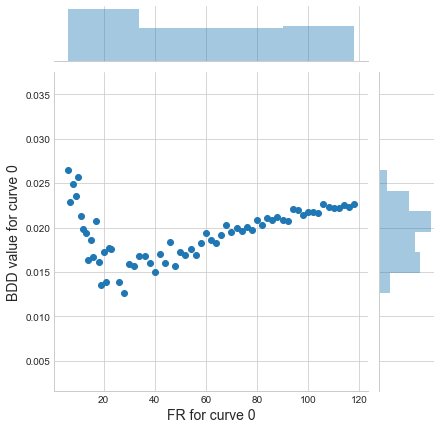

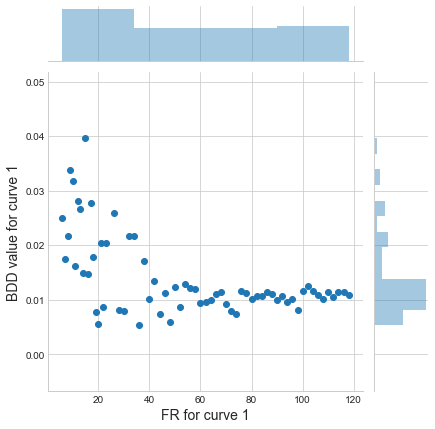

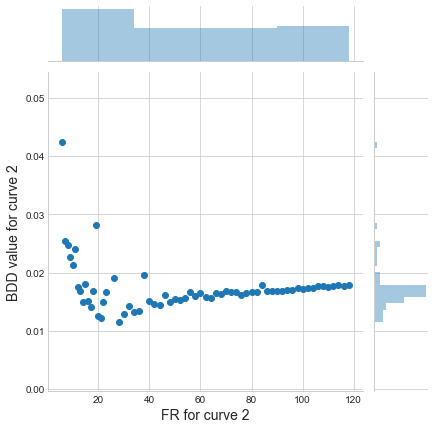

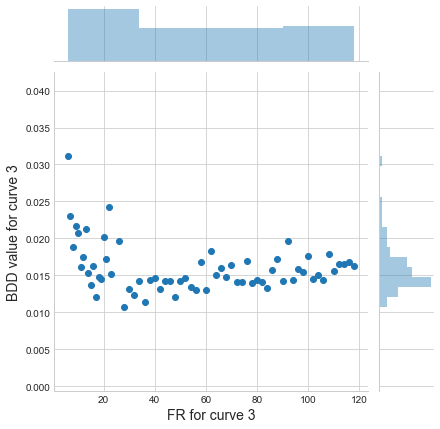

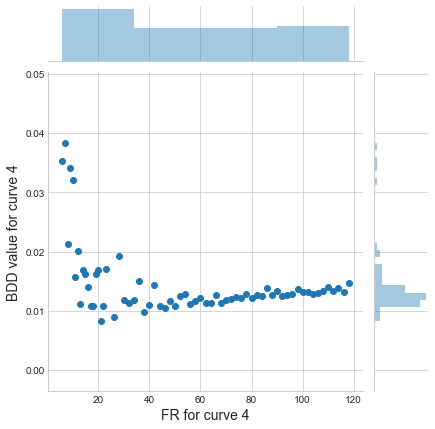

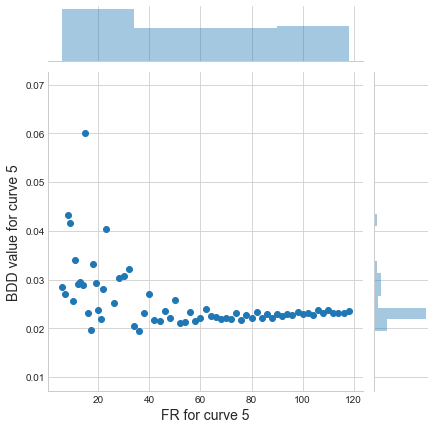

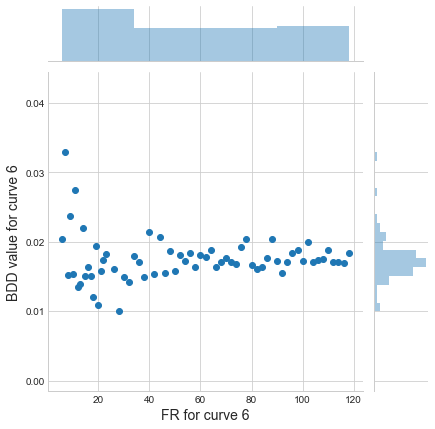

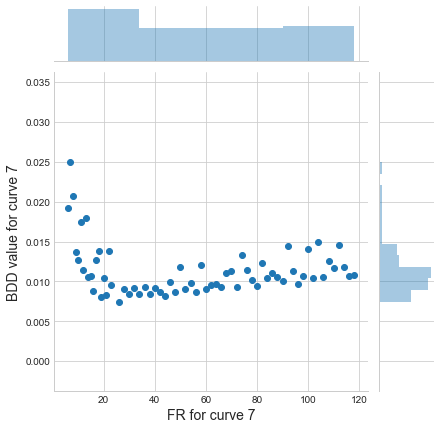

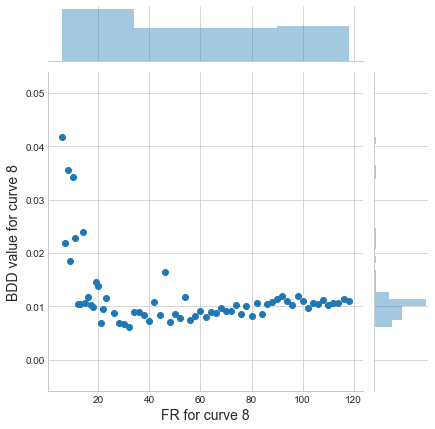

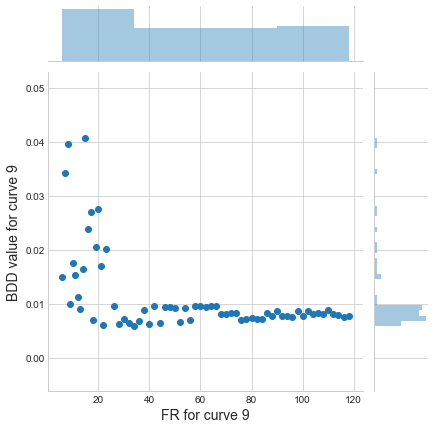

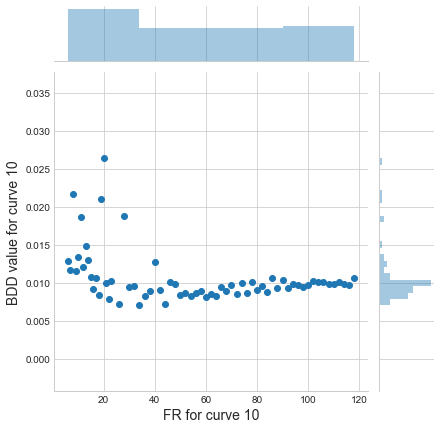

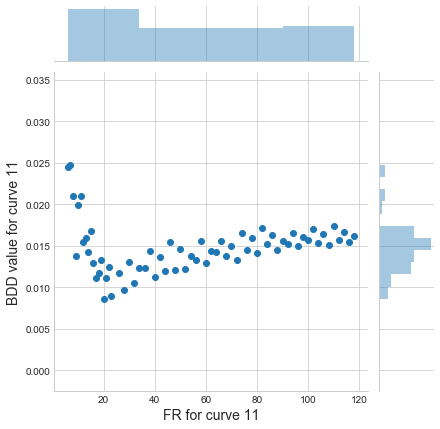

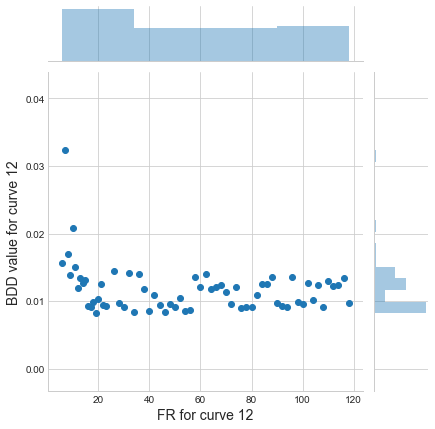

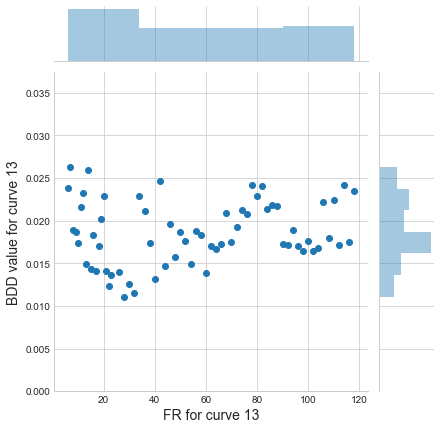

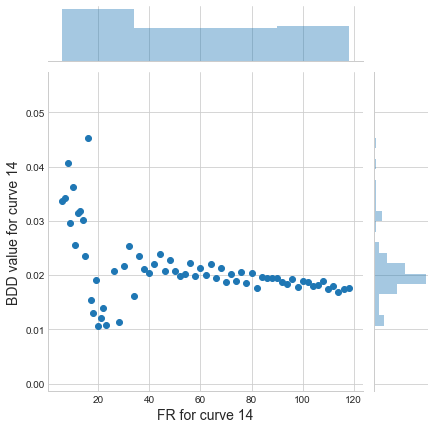

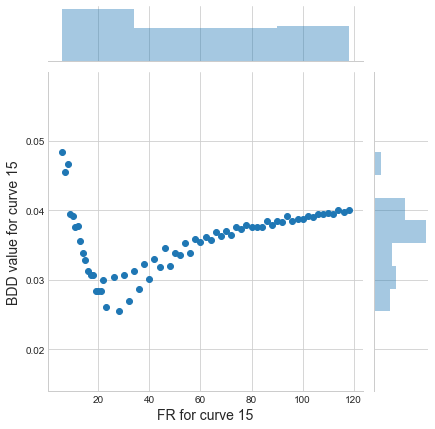

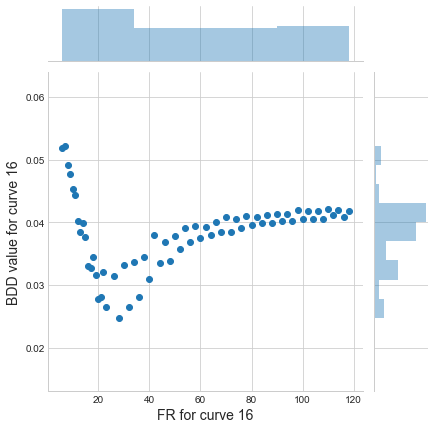

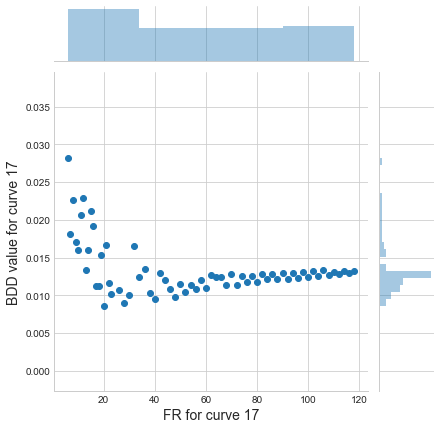

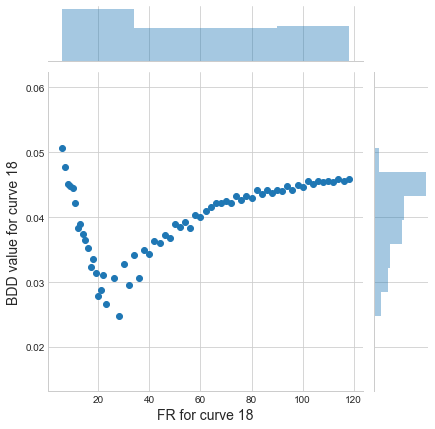

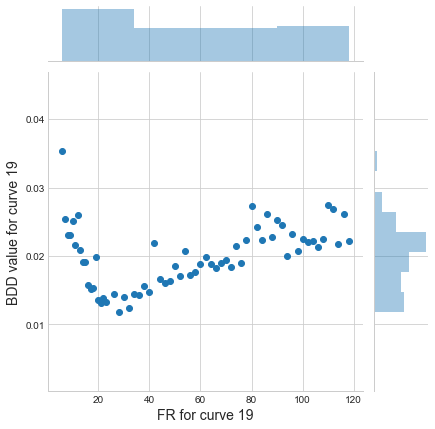

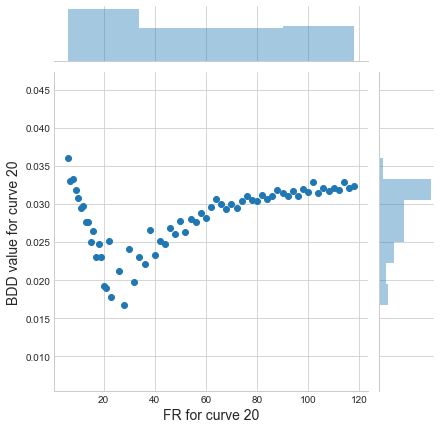

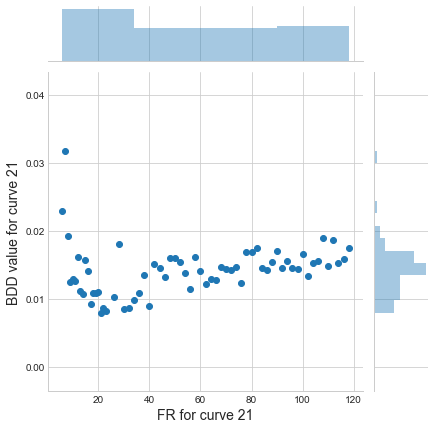

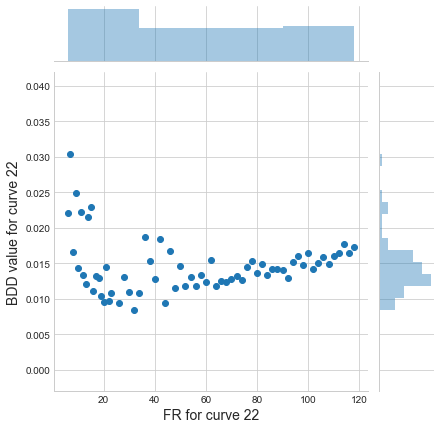

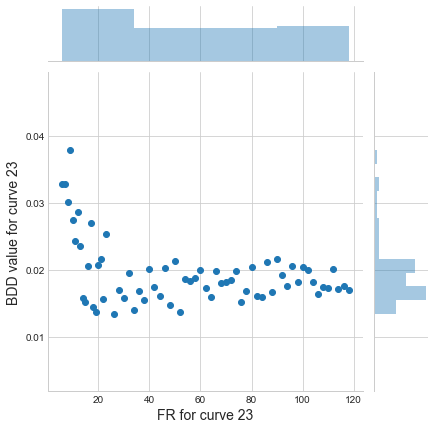

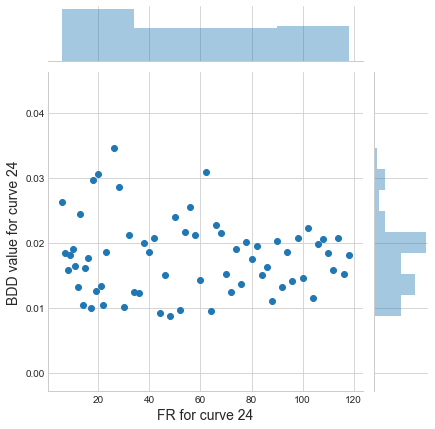

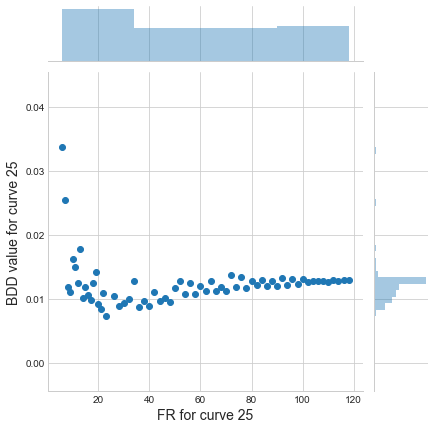

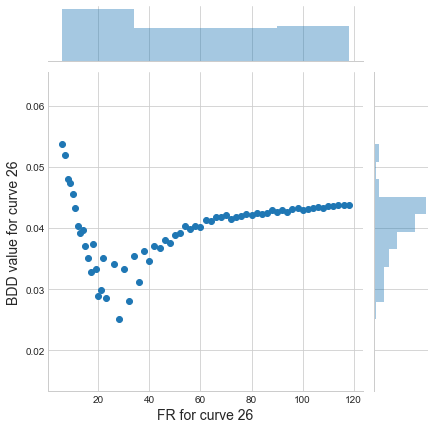

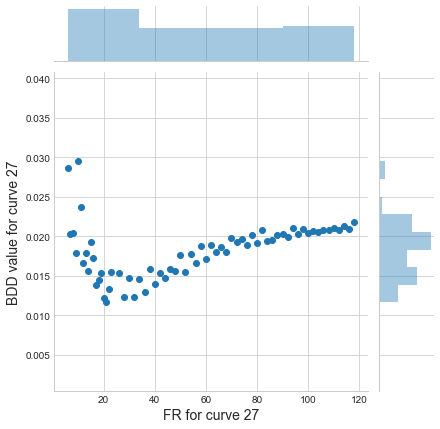

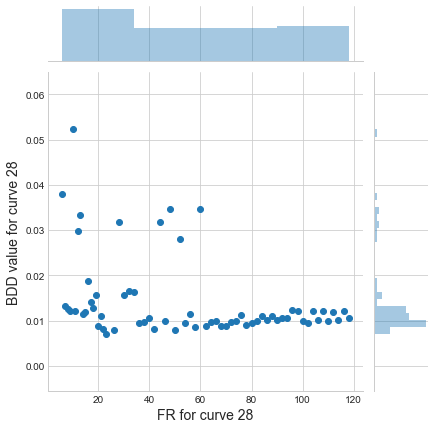

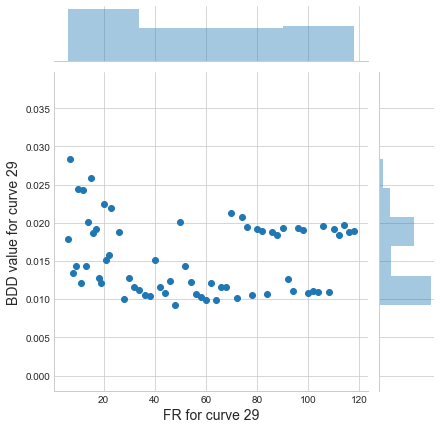

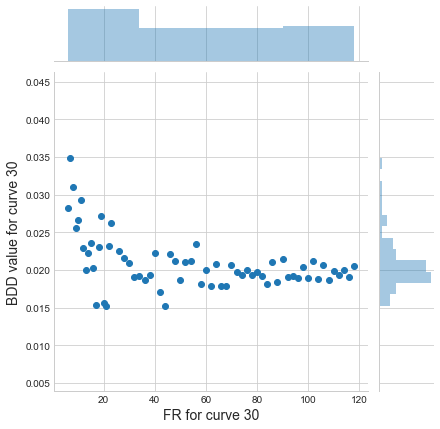

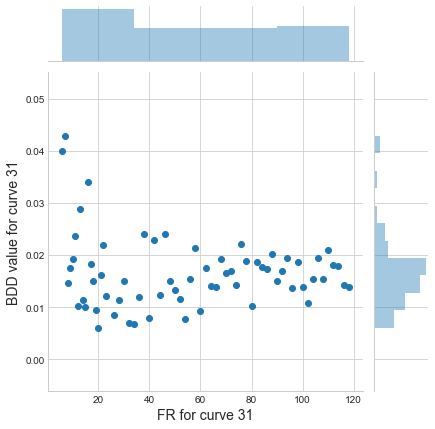

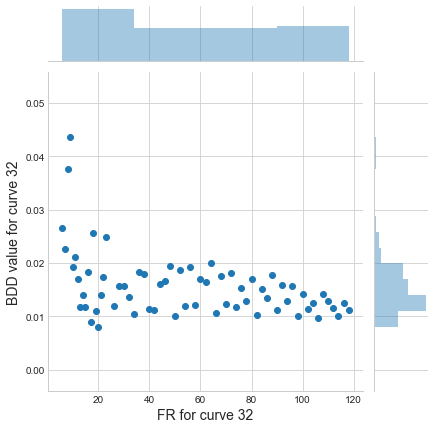

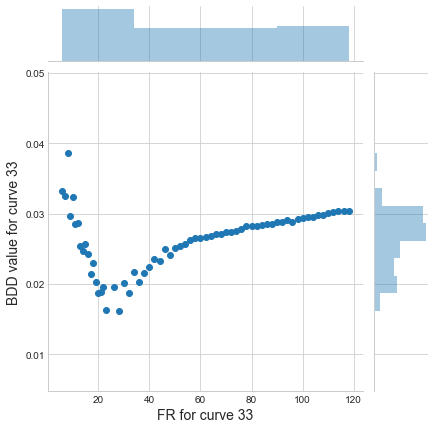

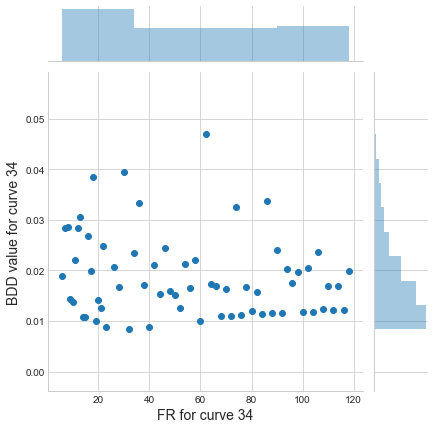

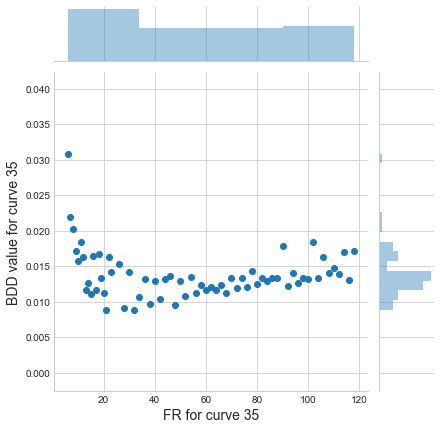

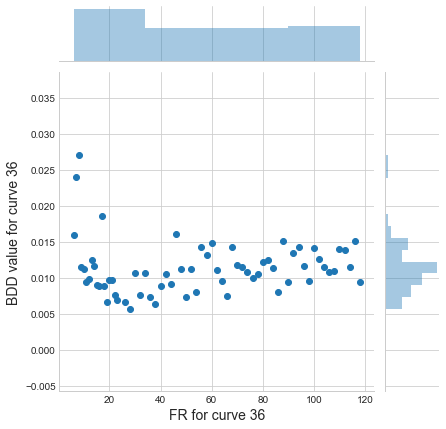

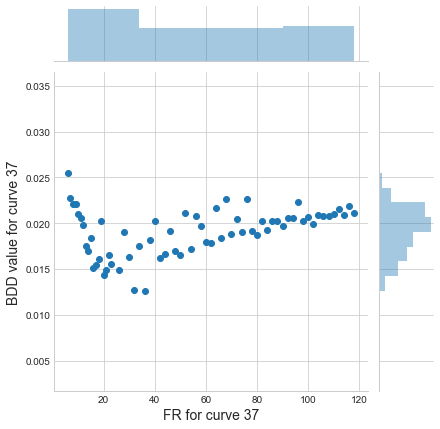

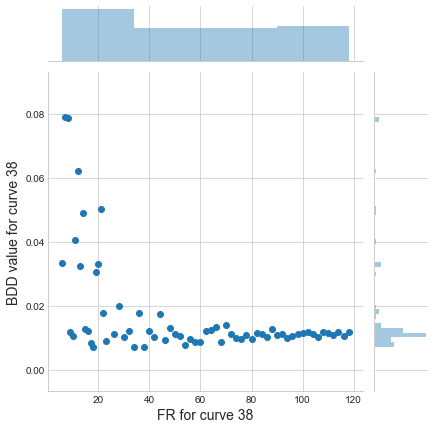

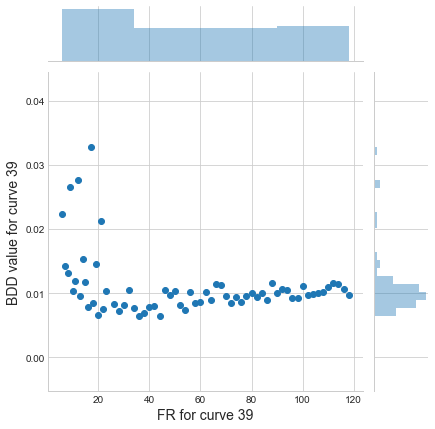

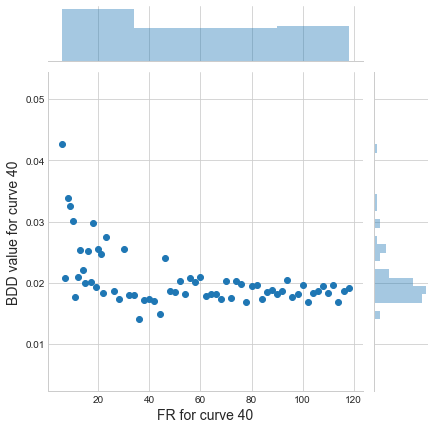

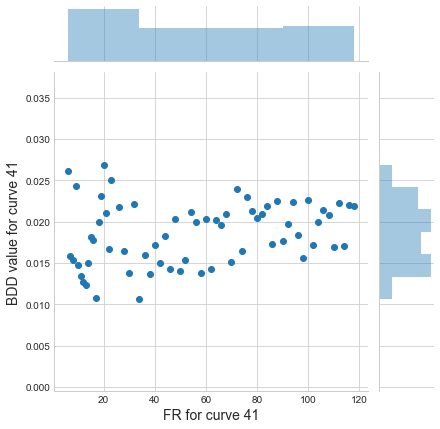

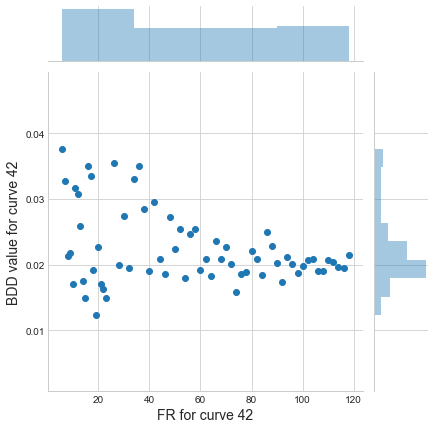

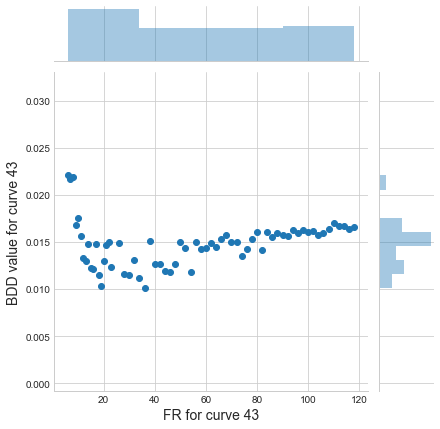

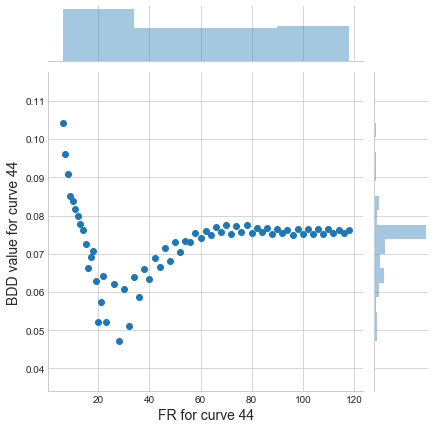

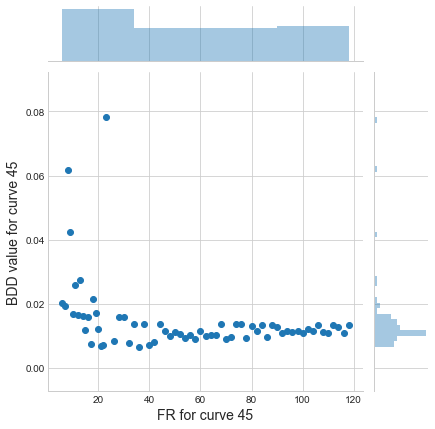

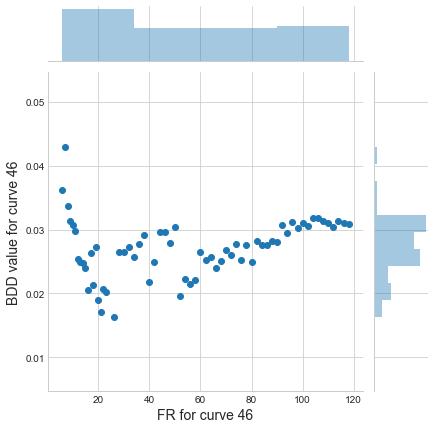

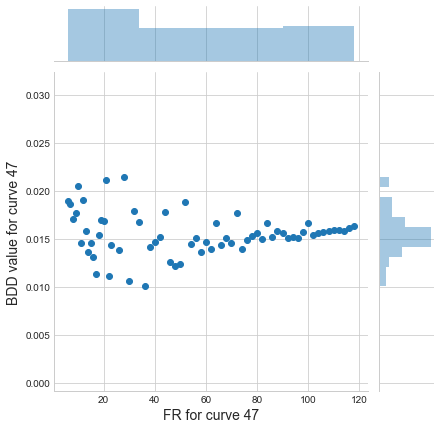

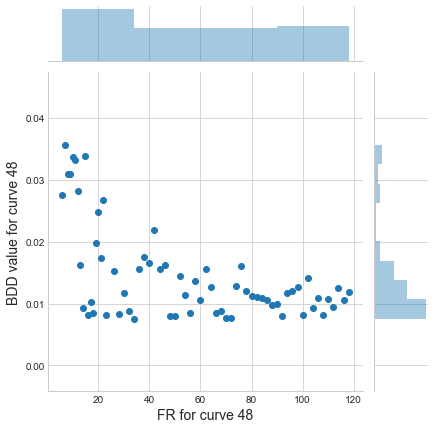

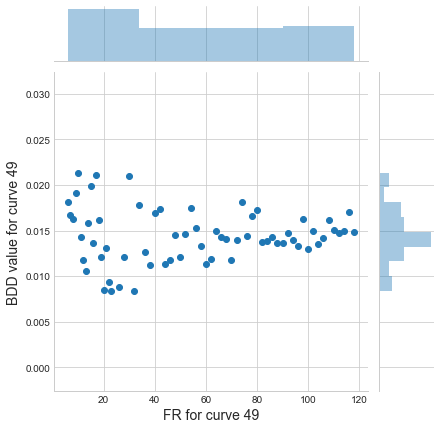

In [39]:
plotBDDforVarSep("FR", 24, list(range(50)))

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [48]:
FR_test_low

,curve_no,FR,Value
0,0,6,0.026445
50,0,7,0.022858
100,0,8,0.024891
150,0,9,0.023506
200,0,10,0.025739
...,...,...,...
699,49,19,0.012126
749,49,20,0.008528
799,49,21,0.013047
849,49,22,0.009351


In [67]:
def RegPlot_for_FR_low(curve):
    data = FR_test_low[FR_test_low.curve_no == curve]
    data = data[data.FR != 24]
    FR = data['FR']
    BDD = data['Value']
    n = len(BDD)
    y = np.empty(n)
    for i in range(n):
        y[i] = 
    
    def fun(x, a, b):
        return a * np.exp(-b * x)+c
    
    popt, pcov = curve_fit(fun, FR, BDD, p0=[0.1, -0.01])
    x_plot=np.linspace(0,24,1000)
    plt.plot(x_plot, func(x_plot, *popt), 'r-')
    plt.scatter(FR,BDD,label='FR vs BDD')
    plt.title("FR vs BDD a*e^-bx +c")
    plt.xlabel('FR')
    plt.ylabel('BDD')
    plt.legend()
    plt.show()
    # equation
    a=popt[0].round(2)
    b=popt[1].round(2)
    c=popt[2].round(2)
    print(f'The equation of regression line is y={a}e^({b}x)')
    
    #p0 needs initial values of a, b, c
    

SyntaxError: invalid syntax (<ipython-input-67-415d97dc01c4>, line 9)

[0.02505302 0.1108515  0.01367329]


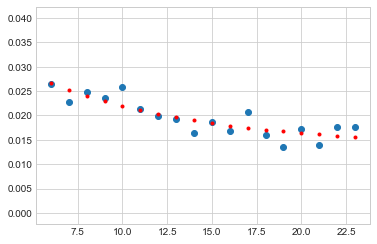

In [87]:
data = FR_test_low[FR_test_low.curve_no == 0]
data = data[data.FR != 24]
FR = np.array(data['FR'])
BDD = data['Value']

def f(x):
    # return math.sqrt(x)
    return float(x)

FR = np.array([f(xi) for xi in FR])
BDD = np.array([f(xi) for xi in BDD])

def exp_fun(x, a, b, c):
    return a * np.exp(-b * x) + c
g = [0.01, 0.07, 0.015]
n = len(BDD)
y = np.empty(n)
#for i in range(n):
#        y[i] = exp_fun(FR[i], g[0], g[1], g[2])
        
plt.scatter(FR, BDD)
fr = data['FR'].values
bdd = data['Value'].values

c, cov = curve_fit(exp_fun, fr, bdd, g)
print(c)

for i in range(n):
        y[i] = exp_fun(FR[i], c[0], c[1], c[2])
        
plt.plot(FR, y, 'r.')


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

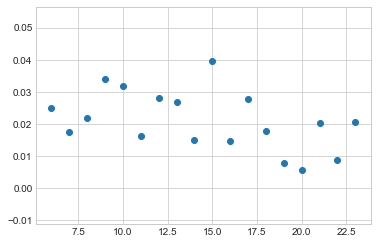

In [91]:
data = FR_test_low[FR_test_low.curve_no == 1]
data = data[data.FR != 24]
FR = np.array(data['FR'])
BDD = data['Value']

def f(x):
    # return math.sqrt(x)
    return float(x)

FR = np.array([f(xi) for xi in FR])
BDD = np.array([f(xi) for xi in BDD])

def exp_fun(x, a, b, c):
    return a * np.exp(-b * x) + c
g = [0.01, 0.07, 0.015]
n = len(BDD)
y = np.empty(n)
for i in range(n):
    y[i] = exp_fun(FR[i], g[0], g[1], g[2])
        
plt.scatter(FR, BDD)
fr = data['FR'].values
bdd = data['Value'].values

c, cov = curve_fit(exp_fun, fr, bdd, g)
print(c)

#for i in range(n):
#       y[i] = exp_fun(FR[i], c[0], c[1], c[2])
        
#plt.plot(FR, y, 'r.')

In [106]:
from sklearn.metrics import mean_squared_error 

The correlation coeffcient for FR and log(BDD) is equal to r =-0.818155825023876
The Mean-Squared Error is equal to 0.012477785538073511


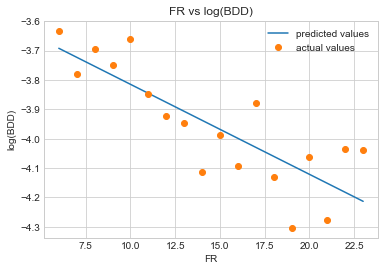

In [115]:
data = FR_test_low[FR_test_low.curve_no == 0]
data = data[data.FR != 24]
FR = np.array(data['FR']) #x-axis
BDD = data['Value'] #y-axis

def f(x):
    # return math.sqrt(x)
    return float(x)

FR = np.array([f(xi) for xi in FR])
BDD = np.array([f(xi) for xi in BDD])

log_of_BDD = np.log(BDD) #log-y-axis
curve_fit = np.polyfit(FR, log_of_BDD, 1)

#1. Linear transformation curve
plt.plot(FR, curve_fit[0]*FR + curve_fit[1], label = 'predicted values')
plt.plot(FR, log_of_BDD, "o", label = 'actual values')
plt.title("FR vs log(BDD)")
plt.xlabel('FR')
plt.ylabel('log(BDD)')
plt.legend()

#equation fo the line: log(BDD) = -0.03063578 * FR - 3.50849631

log_of_BDD_pred = -0.03063578 * FR - 3.50849631

#correlation coef (Pearson's r)
r_matrix = np.corrcoef(FR, log_of_BDD)
r = r_matrix[0, 1]
print('The correlation coeffcient for FR and log(BDD) is equal to r =' + str(r))

#mean-squared-error
mse = mean_squared_error(log_of_BDD, log_of_BDD_pred) 
print('The Mean-Squared Error is equal to ' + str(mse))

#2. Non linear fit

#LABEL THE AXIS
# print(curve_fit)  
# #[-0.03063578 -3.50849631]
# log(y) = -0.03063578 * FR - 3.50849631
# #y = np.exp(-0.03063578 * FR - 3.50849631)

# plt.plot(FR, y)
# plt.show()


In [126]:
r_values = np.zeros(50)
mse_values = np.zeros(50)

def fitExpRegression(curve):
    data = FR_test_low[FR_test_low.curve_no == curve]
    data = data[data.FR != 24]
    FR = np.array(data['FR']) #x-axis
    BDD = data['Value'] #y-axis

    def f(x):
    # return math.sqrt(x)
       return float(x)

    FR = np.array([f(xi) for xi in FR])
    BDD = np.array([f(xi) for xi in BDD])

    log_of_BDD = np.log(BDD) #log-y-axis
    curve_fit = np.polyfit(FR, log_of_BDD, 1)

#1. Linear transformation curve
    plt.plot(FR, curve_fit[0]*FR + curve_fit[1], label = 'predicted values')
    plt.plot(FR, log_of_BDD, "o", label = 'actual values')
    plt.title("FR vs log(BDD) for curve no." + str(curve))
    plt.xlabel('FR')
    plt.ylabel('log(BDD)')
    plt.legend()
    plt.show()

#equation fo the line: log(BDD) = curve_fit[0] * FR + curve_fit[1]

    log_of_BDD_pred = curve_fit[0] * FR + curve_fit[1]
    print('Equation of the line of best fit for curve no. '+str(curve)+': '+'log_of_BDD_pred = '+str(curve_fit[0])+ '*FR '+'+ '+str(curve_fit[1]))

#correlation coef (Pearson's r):
    r_matrix = np.corrcoef(FR, log_of_BDD)
    r = r_matrix[0, 1]
    print('The correlation coeffcient for FR and log(BDD) is equal to r =' + str(r))
    r_values[curve] = r

#mean-squared-error
    mse = mean_squared_error(log_of_BDD, log_of_BDD_pred) 
    print('The Mean-Squared Error is equal to ' + str(mse))
    mse_values[curve]=mse

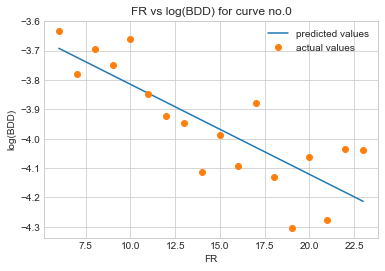

Equation of the line of best fit for curve no. 0: log_of_BDD_pred = -0.030635776981409384*FR + -3.508496305401329
The correlation coeffcient for FR and log(BDD) is equal to r =-0.818155825023876
The Mean-Squared Error is equal to 0.01247778553807094


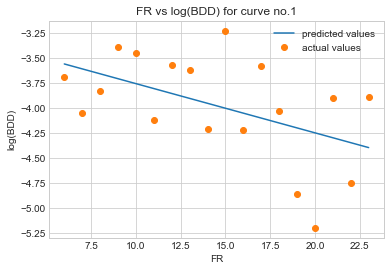

Equation of the line of best fit for curve no. 1: log_of_BDD_pred = -0.049203322349962435*FR + -3.2655086971411977
The correlation coeffcient for FR and log(BDD) is equal to r =-0.4950241808433059
The Mean-Squared Error is equal to 0.20075949996628278


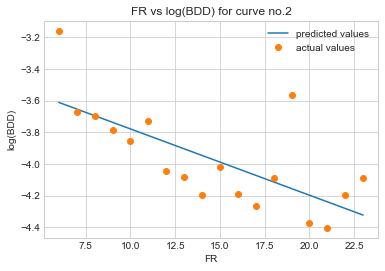

Equation of the line of best fit for curve no. 2: log_of_BDD_pred = -0.04188747008000365*FR + -3.3603480118237217
The correlation coeffcient for FR and log(BDD) is equal to r =-0.7009181062790985
The Mean-Squared Error is equal to 0.0489022121920693


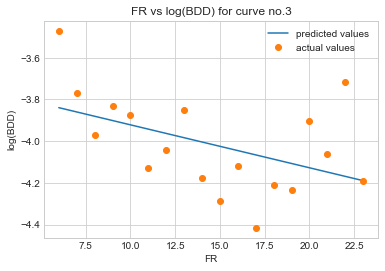

Equation of the line of best fit for curve no. 3: log_of_BDD_pred = -0.020583248096837578*FR + -3.7158464230673864
The correlation coeffcient for FR and log(BDD) is equal to r =-0.46570670732680425
The Mean-Squared Error is equal to 0.04117664001050385


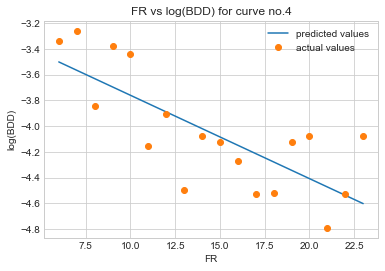

Equation of the line of best fit for curve no. 4: log_of_BDD_pred = -0.06474290466015488*FR + -3.1133371003479096
The correlation coeffcient for FR and log(BDD) is equal to r =-0.7606446418656458
The Mean-Squared Error is equal to 0.08217824811708876


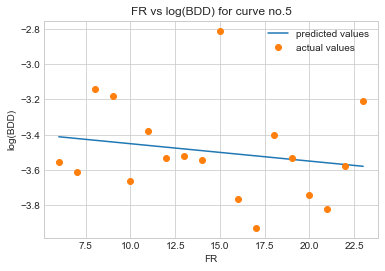

Equation of the line of best fit for curve no. 5: log_of_BDD_pred = -0.009850146995391322*FR + -3.3525723707457127
The correlation coeffcient for FR and log(BDD) is equal to r =-0.19117027279041812
The Mean-Squared Error is equal to 0.06884888810458573


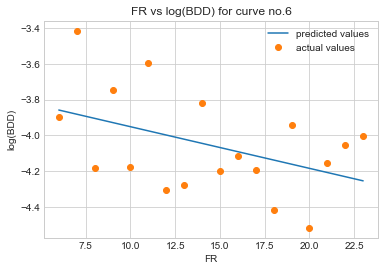

Equation of the line of best fit for curve no. 6: log_of_BDD_pred = -0.023298947578596654*FR + -3.718170285332177
The correlation coeffcient for FR and log(BDD) is equal to r =-0.44016901989874346
The Mean-Squared Error is equal to 0.06080304536279857


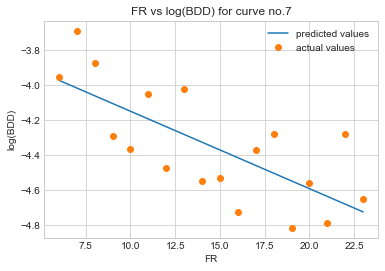

Equation of the line of best fit for curve no. 7: log_of_BDD_pred = -0.044328048456528484*FR + -3.70601374553997
The correlation coeffcient for FR and log(BDD) is equal to r =-0.7238728220826794
The Mean-Squared Error is equal to 0.048047227753056386


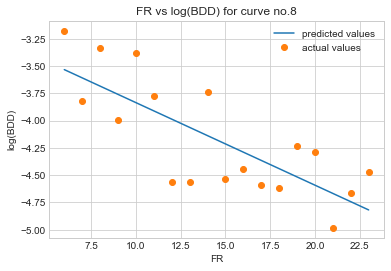

Equation of the line of best fit for curve no. 8: log_of_BDD_pred = -0.07566085534340934*FR + -3.0784966422232394
The correlation coeffcient for FR and log(BDD) is equal to r =-0.766772222941835
The Mean-Squared Error is equal to 0.10799206898322682


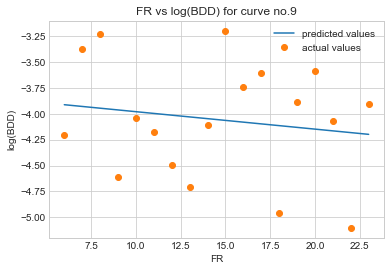

Equation of the line of best fit for curve no. 9: log_of_BDD_pred = -0.016823518421024752*FR + -3.812285783978944
The correlation coeffcient for FR and log(BDD) is equal to r =-0.1603390750896081
The Mean-Squared Error is equal to 0.28871213934224627


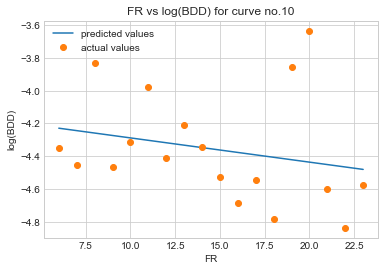

Equation of the line of best fit for curve no. 10: log_of_BDD_pred = -0.014806385505916073*FR + -4.140164898533511
The correlation coeffcient for FR and log(BDD) is equal to r =-0.23456033907567458
The Mean-Squared Error is equal to 0.10135227517838717


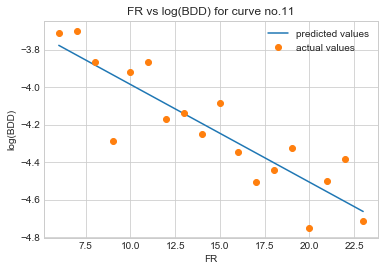

Equation of the line of best fit for curve no. 11: log_of_BDD_pred = -0.05214198292873203*FR + -3.4645050980452434
The correlation coeffcient for FR and log(BDD) is equal to r =-0.8803945265074961
The Mean-Squared Error is equal to 0.021234484772684834


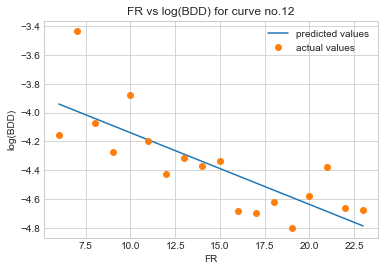

Equation of the line of best fit for curve no. 12: log_of_BDD_pred = -0.04967933747435501*FR + -3.6422828511521383
The correlation coeffcient for FR and log(BDD) is equal to r =-0.7786179910905737
The Mean-Squared Error is equal to 0.043146840893920874


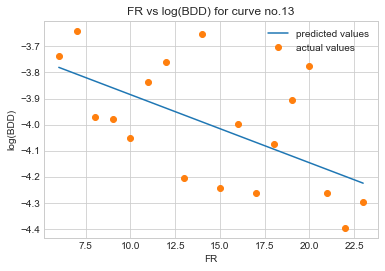

Equation of the line of best fit for curve no. 13: log_of_BDD_pred = -0.02616021424258468*FR + -3.623427859587197
The correlation coeffcient for FR and log(BDD) is equal to r =-0.5876964937244613
The Mean-Squared Error is equal to 0.03491259926446937


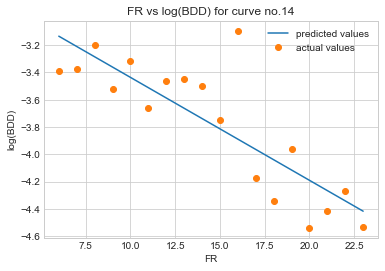

Equation of the line of best fit for curve no. 14: log_of_BDD_pred = -0.07540066169245699*FR + -2.6823656359037535
The correlation coeffcient for FR and log(BDD) is equal to r =-0.8308900034531241
The Mean-Squared Error is equal to 0.06863032519855622


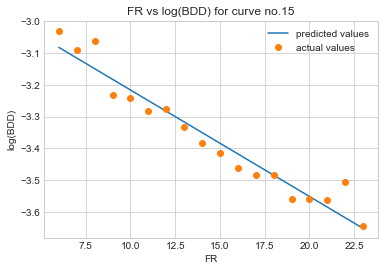

Equation of the line of best fit for curve no. 15: log_of_BDD_pred = -0.03355233705218476*FR + -2.880835202456766
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9691261959776026
The Mean-Squared Error is equal to 0.0019614166383568016


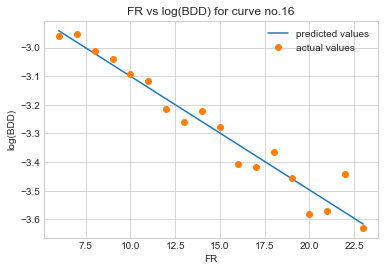

Equation of the line of best fit for curve no. 16: log_of_BDD_pred = -0.03973394507031497*FR + -2.702604384458414
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9729699837224848
The Mean-Squared Error is equal to 0.002393936083455276


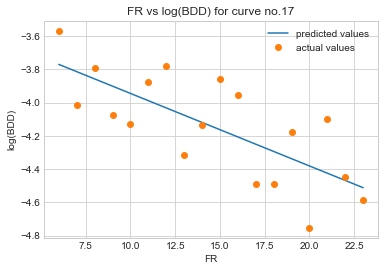

Equation of the line of best fit for curve no. 17: log_of_BDD_pred = -0.0436087188801443*FR + -3.5088059588436837
The correlation coeffcient for FR and log(BDD) is equal to r =-0.7283728892326413
The Mean-Squared Error is equal to 0.04529715724809336


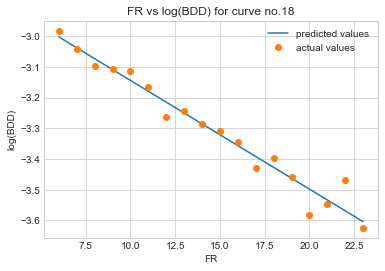

Equation of the line of best fit for curve no. 18: log_of_BDD_pred = -0.03542955836733676*FR + -2.789566815355403
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9799358875797466
The Mean-Squared Error is equal to 0.0013977468055199832


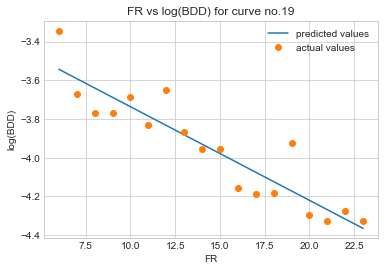

Equation of the line of best fit for curve no. 19: log_of_BDD_pred = -0.048354345639021606*FR + -3.2528102562217653
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9162085325177978
The Mean-Squared Error is equal to 0.012037774388649768


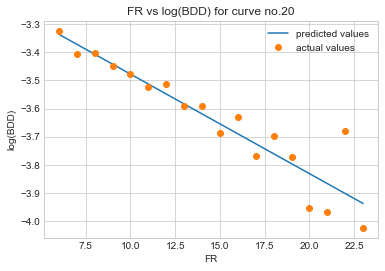

Equation of the line of best fit for curve no. 20: log_of_BDD_pred = -0.03537021803800441*FR + -3.1239908941166026
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9290797000287584
The Mean-Squared Error is equal to 0.005337176228099201


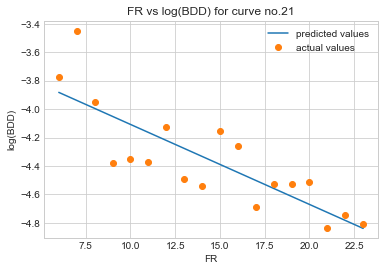

Equation of the line of best fit for curve no. 21: log_of_BDD_pred = -0.056238478046317986*FR + -3.544990476112319
The correlation coeffcient for FR and log(BDD) is equal to r =-0.8221374331064251
The Mean-Squared Error is equal to 0.040819270115559934


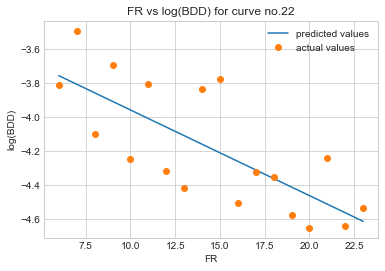

Equation of the line of best fit for curve no. 22: log_of_BDD_pred = -0.05038836766944888*FR + -3.4539923540713793
The correlation coeffcient for FR and log(BDD) is equal to r =-0.7428884099239089
The Mean-Squared Error is equal to 0.055491431197953654


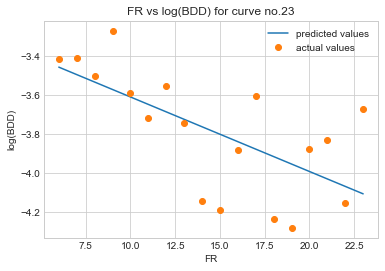

Equation of the line of best fit for curve no. 23: log_of_BDD_pred = -0.038153105085815014*FR + -3.2287827849241704
The correlation coeffcient for FR and log(BDD) is equal to r =-0.6528608420646979
The Mean-Squared Error is equal to 0.052744807134536026


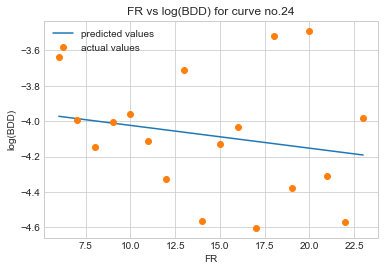

Equation of the line of best fit for curve no. 24: log_of_BDD_pred = -0.012877382394733886*FR + -3.8945681012780486
The correlation coeffcient for FR and log(BDD) is equal to r =-0.20057782940343247
The Mean-Squared Error is equal to 0.10648222420775201


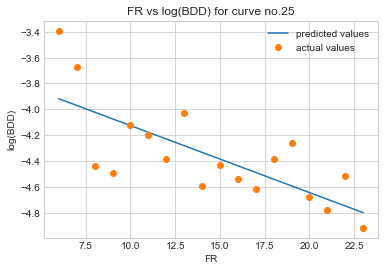

Equation of the line of best fit for curve no. 25: log_of_BDD_pred = -0.05188279507891147*FR + -3.6066766415442184
The correlation coeffcient for FR and log(BDD) is equal to r =-0.7337512449700154
The Mean-Squared Error is equal to 0.06212189213627376


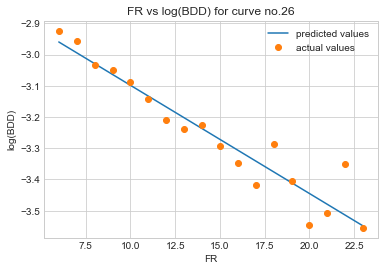

Equation of the line of best fit for curve no. 26: log_of_BDD_pred = -0.03466096247291574*FR + -2.751837101145348
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9521693749189362
The Mean-Squared Error is equal to 0.003330409575873955


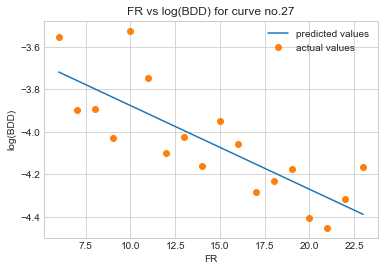

Equation of the line of best fit for curve no. 27: log_of_BDD_pred = -0.03946467958808335*FR + -3.4811496296282614
The correlation coeffcient for FR and log(BDD) is equal to r =-0.8032199855239467
The Mean-Squared Error is equal to 0.023056805020262236


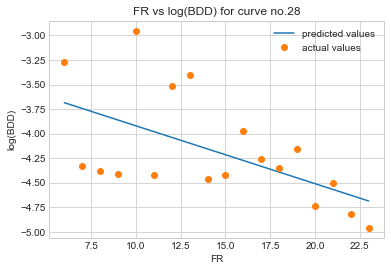

Equation of the line of best fit for curve no. 28: log_of_BDD_pred = -0.058934735589162957*FR + -3.33155651415678
The correlation coeffcient for FR and log(BDD) is equal to r =-0.5678479195229914
The Mean-Squared Error is equal to 0.19644474665494652


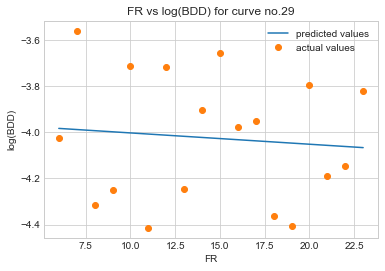

Equation of the line of best fit for curve no. 29: log_of_BDD_pred = -0.004890187911529719*FR + -3.9543483936555655
The correlation coeffcient for FR and log(BDD) is equal to r =-0.09460509621416058
The Mean-Squared Error is equal to 0.07127526156345493


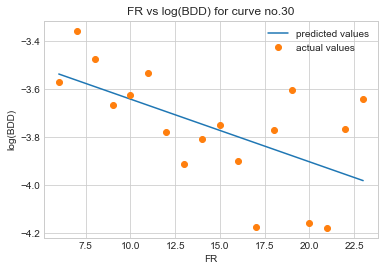

Equation of the line of best fit for curve no. 30: log_of_BDD_pred = -0.026181842592805885*FR + -3.3790314314944725
The correlation coeffcient for FR and log(BDD) is equal to r =-0.5900928463902501
The Mean-Squared Error is equal to 0.03453734692841951


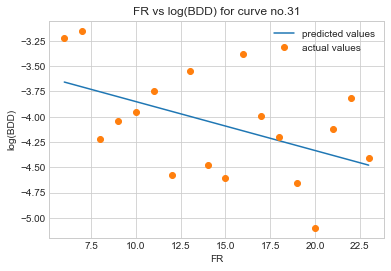

Equation of the line of best fit for curve no. 31: log_of_BDD_pred = -0.048320842480279645*FR + -3.3677263379495335
The correlation coeffcient for FR and log(BDD) is equal to r =-0.48584196284243064
The Mean-Squared Error is equal to 0.20340867675946003


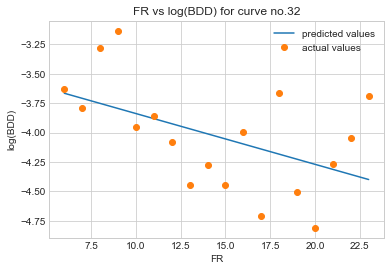

Equation of the line of best fit for curve no. 32: log_of_BDD_pred = -0.04317323039743324*FR + -3.405923409455887
The correlation coeffcient for FR and log(BDD) is equal to r =-0.4986763131260626
The Mean-Squared Error is equal to 0.15157897141680707


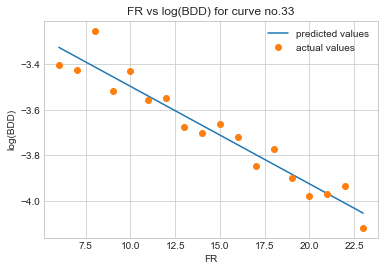

Equation of the line of best fit for curve no. 33: log_of_BDD_pred = -0.04275455723917505*FR + -3.069532832564521
The correlation coeffcient for FR and log(BDD) is equal to r =-0.961728981488345
The Mean-Squared Error is equal to 0.003993831372261429


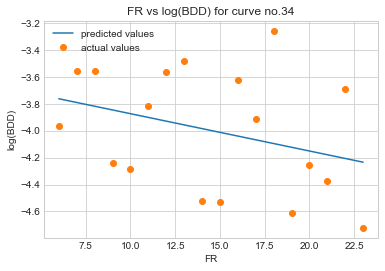

Equation of the line of best fit for curve no. 34: log_of_BDD_pred = -0.0276930206475567*FR + -3.5973827239683773
The correlation coeffcient for FR and log(BDD) is equal to r =-0.326909051128243
The Mean-Squared Error is equal to 0.17251344673897961


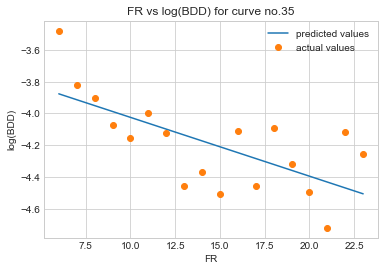

Equation of the line of best fit for curve no. 35: log_of_BDD_pred = -0.03706101789663502*FR + -3.6540434140643803
The correlation coeffcient for FR and log(BDD) is equal to r =-0.6705663515034158
The Mean-Squared Error is equal to 0.04524849453205324


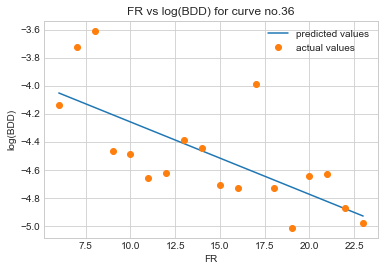

Equation of the line of best fit for curve no. 36: log_of_BDD_pred = -0.051652815947771054*FR + -3.742734059036699
The correlation coeffcient for FR and log(BDD) is equal to r =-0.6971308617944203
The Mean-Squared Error is equal to 0.07595406402233028


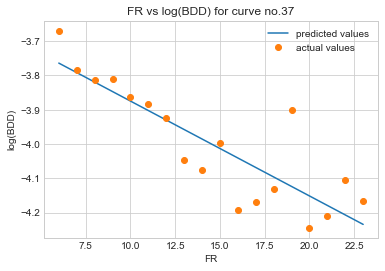

Equation of the line of best fit for curve no. 37: log_of_BDD_pred = -0.02768456351633721*FR + -3.597765125130097
The correlation coeffcient for FR and log(BDD) is equal to r =-0.8558026977714146
The Mean-Squared Error is equal to 0.007537689997731174


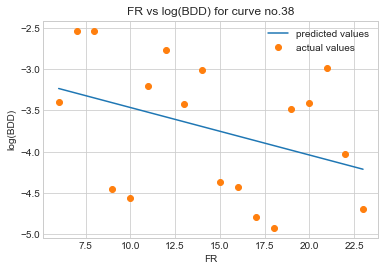

Equation of the line of best fit for curve no. 38: log_of_BDD_pred = -0.05746455056213087*FR + -2.890464312080823
The correlation coeffcient for FR and log(BDD) is equal to r =-0.37894368525169353
The Mean-Squared Error is equal to 0.5300898256974016


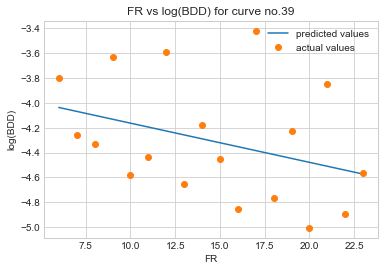

Equation of the line of best fit for curve no. 39: log_of_BDD_pred = -0.03154481291190117*FR + -3.8479252356729834
The correlation coeffcient for FR and log(BDD) is equal to r =-0.35168407194117196
The Mean-Squared Error is equal to 0.18977267425661729


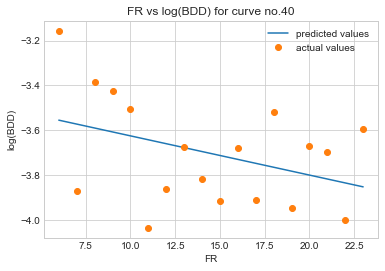

Equation of the line of best fit for curve no. 40: log_of_BDD_pred = -0.01750601488947766*FR + -3.45018184606145
The correlation coeffcient for FR and log(BDD) is equal to r =-0.3888462373847749
The Mean-Squared Error is equal to 0.04630679440352328


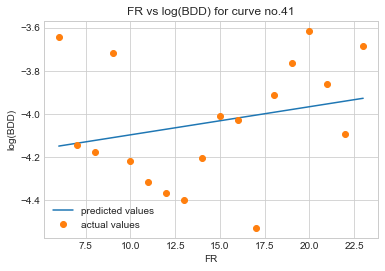

Equation of the line of best fit for curve no. 41: log_of_BDD_pred = 0.013009406730571776*FR + -4.226449685002056
The correlation coeffcient for FR and log(BDD) is equal to r =0.2482349479416631
The Mean-Squared Error is equal to 0.06937274545874111


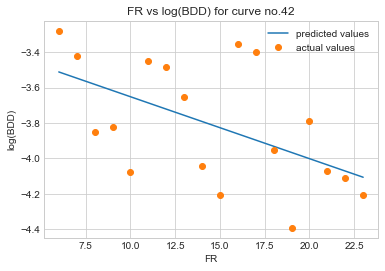

Equation of the line of best fit for curve no. 42: log_of_BDD_pred = -0.03502328410384202*FR + -3.3012121080881274
The correlation coeffcient for FR and log(BDD) is equal to r =-0.5394001663818501
The Mean-Squared Error is equal to 0.08046150733318988


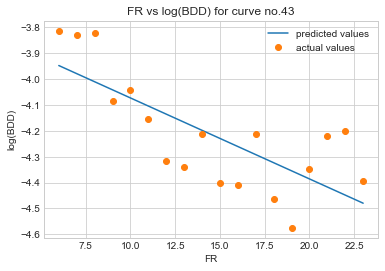

Equation of the line of best fit for curve no. 43: log_of_BDD_pred = -0.03129653544019316*FR + -3.7597531315763137
The correlation coeffcient for FR and log(BDD) is equal to r =-0.7447532863291682
The Mean-Squared Error is equal to 0.02116816103139506


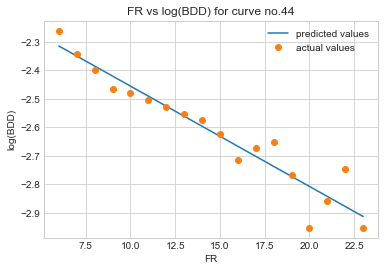

Equation of the line of best fit for curve no. 44: log_of_BDD_pred = -0.035203956563699394*FR + -2.1028439448271605
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9550804902093223
The Mean-Squared Error is equal to 0.0032116183595390447


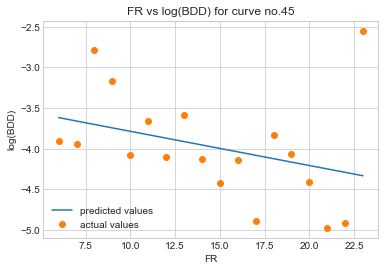

Equation of the line of best fit for curve no. 45: log_of_BDD_pred = -0.042104725215190736*FR + -3.3646616746428926
The correlation coeffcient for FR and log(BDD) is equal to r =-0.33620325042480104
The Mean-Squared Error is equal to 0.3744439178070261


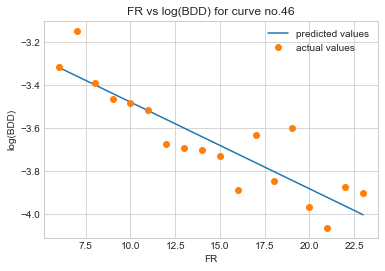

Equation of the line of best fit for curve no. 46: log_of_BDD_pred = -0.04027682026577849*FR + -3.0765779584855157
The correlation coeffcient for FR and log(BDD) is equal to r =-0.8831337620566835
The Mean-Squared Error is equal to 0.012321083127576581


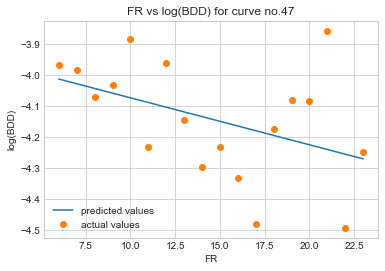

Equation of the line of best fit for curve no. 47: log_of_BDD_pred = -0.015127017056546205*FR + -3.921588095872851
The correlation coeffcient for FR and log(BDD) is equal to r =-0.4352552608337926
The Mean-Squared Error is equal to 0.026352459391865136


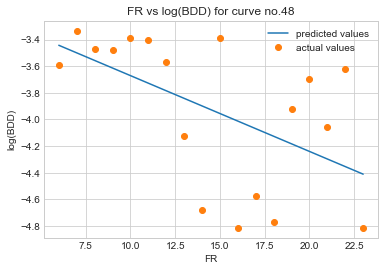

Equation of the line of best fit for curve no. 48: log_of_BDD_pred = -0.056922188587196346*FR + -3.1013102137802635
The correlation coeffcient for FR and log(BDD) is equal to r =-0.5432166138172781
The Mean-Squared Error is equal to 0.2083413901820861


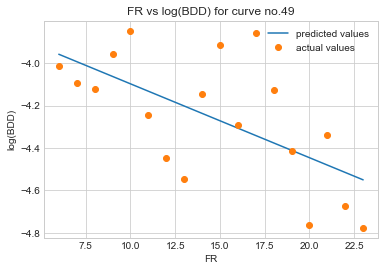

Equation of the line of best fit for curve no. 49: log_of_BDD_pred = -0.03487398137031381*FR + -3.748506748807682
The correlation coeffcient for FR and log(BDD) is equal to r =-0.6225005277984093
The Mean-Squared Error is equal to 0.051742342482942044
[-0.81815583 -0.49502418 -0.70091811 -0.46570671 -0.76064464 -0.19117027
 -0.44016902 -0.72387282 -0.76677222 -0.16033908 -0.23456034 -0.88039453
 -0.77861799 -0.58769649 -0.83089    -0.9691262  -0.97296998 -0.72837289
 -0.97993589 -0.91620853 -0.9290797  -0.82213743 -0.74288841 -0.65286084
 -0.20057783 -0.73375124 -0.95216937 -0.80321999 -0.56784792 -0.0946051
 -0.59009285 -0.48584196 -0.49867631 -0.96172898 -0.32690905 -0.67056635
 -0.69713086 -0.8558027  -0.37894369 -0.35168407 -0.38884624  0.24823495
 -0.53940017 -0.74475329 -0.95508049 -0.33620325 -0.88313376 -0.43525526
 -0.54321661 -0.62250053]
[0.01247779 0.2007595  0.04890221 0.04117664 0.08217825 0.06884889
 0.06080305 0.04804723 0.10799207 0.28871214 0.10135228 0.02123448
 0.04

In [128]:
for i in range(50):
    fitExpRegression(i)
    
print(r_values)
print(mse_values)


In [13]:
density_high_sequence = [2.368992797258969, 3.2898658440840056, 5.473812199530617, 4.574146602662274, 
                         2.6141573284228126, 5.96774414486297, 4.919487032372022, 5.477229681809226, 
                         6.742887510799092, 2.345219811091552, 5.731522408977321, 3.993338537545986, 
                         7.889034959596039, 7.007766085735554, 4.217502998657783, 7.605826873681228,
                         2.0942184770464873, 2.542377644820858, 6.462880785207142, 2.549370957944128, 
                         7.137798629767561, 4.795589643398923, 6.045053445122158, 4.906692977326488, 
                         7.598186263992971, 4.833726585289512, 3.1708362804940107, 7.161979381629832,
                         5.306152816775535, 2.0872776459143214, 3.635836263604438, 6.165319987583199, 
                         2.0038089224212623, 7.533163519018309, 4.606802991494709, 5.123603390379272, 
                         7.976843833741872, 4.88059504692373, 6.726006046753367, 6.478311752285514,
                         7.5641876376455235, 3.709645474493994, 3.971763829555001, 2.8308933469802953, 
                         2.092628573464515, 2.344690794845139, 7.672325316009733, 3.905226532844937, 
                         3.444615738840314, 7.912618974332681]

density_low_sequence = [1.0906912451058035, 1.268479888157353, 1.1679789287915743, 1.6633547378982025, 
                        1.7321744370406937, 1.122045331110551, 1.2272947823777238, 0.8255097659351933, 
                        1.2916626185228084, 1.9371499257510707, 1.3530284234527397, 1.2013791915770669,
                        1.0328891792633028, 1.719768238512047, 0.7260818498032382, 1.2956324976020566, 
                        0.8138626893973424, 1.083666675641727, 0.5872537420307997, 1.6176015180698782, 
                        1.5944544810207444, 1.4769154852446387, 1.7144448832683261, 1.1889047509079453, 
                        1.4975589647608254, 1.7472224459326873, 0.8885039498009015, 0.5540597093138122, 
                        1.7885775630922738, 1.7963759381823556, 1.112417410993694, 1.1035645550893247, 
                        1.6817017739193096, 1.960848387207407, 1.4710519729614413, 0.7679457658315942, 
                        1.422682375926864, 1.9331329008370457, 1.1262315521264585, 1.303818727304506, 
                        1.9349910658067457, 0.9212269099361686, 1.631284465923661, 1.2742029423793777, 
                        1.1645463456276386, 1.1776386616022918, 0.9996399216968882, 1.2382198048648845, 
                        1.1723253337564363, 1.9242555125998462]

FR_high_sequence = list(range(26, 120, 2))

FR_low_sequence = list(range(6, 24, 1))

In [14]:
user_path = '/Users/karolinagrzeszkiewicz/robustness-tests/locomotion/tests/robustness_tests/results/'
trial_dict = {
    "FR_test_higher": FR_high_sequence,
    "FR_test_lower": FR_low_sequence,
    "density_test_higher": density_high_sequence,
    "density_test_lower": density_low_sequence
}

def curvePlot(folder, var, curve_no, trial):
    #curve_no and trial must be double-digit strings (also trial can be = "CTRL")
    name_of_dat = 'CRV_'+curve_no+'_TEST_' + trial +'.dat'
    path_to_dat = user_path +folder+'/'+name_of_dat
    data = pd.read_csv(path_to_dat)
    x = data.X
    y = data.Y
    plt.plot(x, y)
    if trial == "CTRL":
        plt.title("Coordinate plot for Curve No. " + curve_no + ', Trial No.' + trial)
    else:
        trial_int = int(trial)
        tests = trial_dict[folder]
        trial_value = tests[trial_int]
        plt.title("Coordinate plot for Curve No. " + curve_no + ', Trial No.' + trial + ', ' + var +':'+str(trial_value))
    x_max = max(x)
    y_max = max(y)
    l = []
    l.append(x_max)
    l.append(y_max)
    m = max(l)
    plt.axis([0, m+20 , 0, m +20])
    plt.show()
    
#axis labels needed

In [35]:
def curvePlotZoomIn(folder, var, curve_no, trial, x_min, x_max, y_min, y_max):
    #curve_no and trial must be double-digit strings (also trial can be = "CTRL")
    name_of_dat = 'CRV_'+curve_no+'_TEST_' + trial +'.dat'
    path_to_dat = user_path +folder+'/'+name_of_dat
    data = pd.read_csv(path_to_dat)
    x = data.X
    y = data.Y
    plt.plot(x, y)
    if trial == "CTRL":
        plt.title("Coordinate plot for Curve No. " + curve_no + ', Trial No.' + trial)
    else:
        trial_int = int(trial)
        tests = trial_dict[folder]
        trial_value = tests[trial_int]
        plt.title("Coordinate plot for Curve No. " + curve_no + ', Trial No.' + trial + ', ' + var +':'+str(trial_value))
    x_max = max(x)
    y_max = max(y)
    l = []
    l.append(x_max)
    l.append(y_max)
    m = max(l)
    plt.axis([x_min, x_max , y_min, y_max])
    plt.show()

In [15]:
def curvePlot_for_all_trials(folder, var, curve_no):
    trials = trial_dict[folder]
    n_trials = len(trials)
    curvePlot(folder, var, curve_no, "CTRL")
    for i in range(n_trials):
        trial = '%02d' % i
        curvePlot(folder, var, curve_no, trial)

In [16]:
#curvePlot_for_all_trials('FR_test_lower', 'FR', '44')
#curvePlot_for_all_trials('FR_test_higher', 'FR', '44')

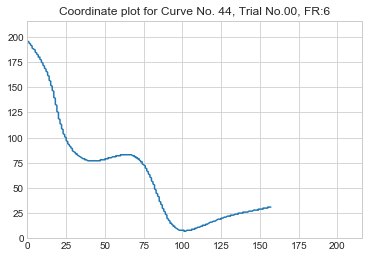

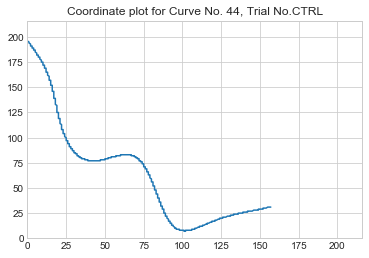

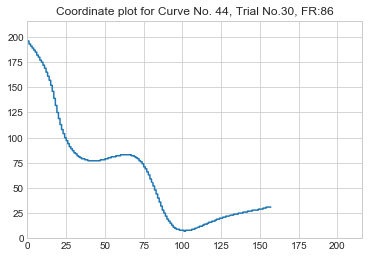

In [26]:
curvePlot('FR_test_lower', 'FR', '44', '00')
curvePlot('FR_test_higher', 'FR', '44', 'CTRL')
curvePlot('FR_test_higher', 'FR', '44', '30')
#scatterplot instead

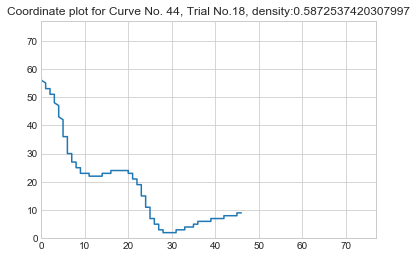

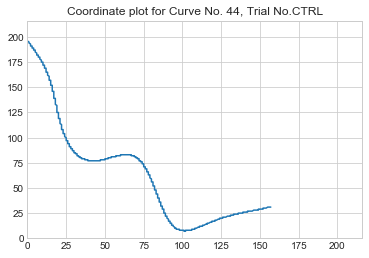

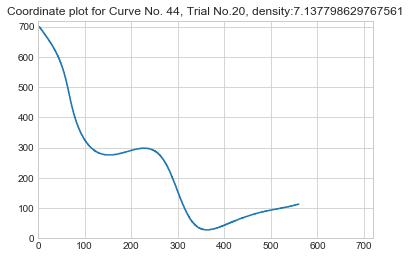

In [28]:
curvePlot('density_test_lower', 'density', '44', '18')
curvePlot('density_test_lower', 'density', '44', 'CTRL')
curvePlot('density_test_higher', 'density', '44', '20')

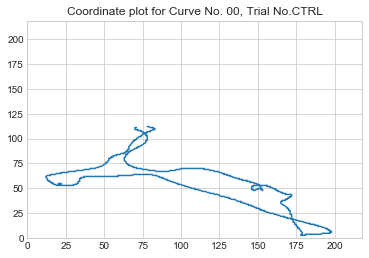

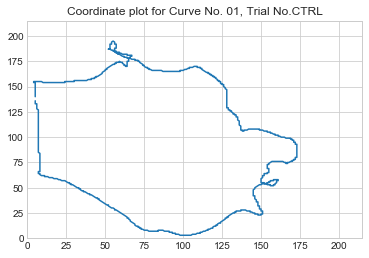

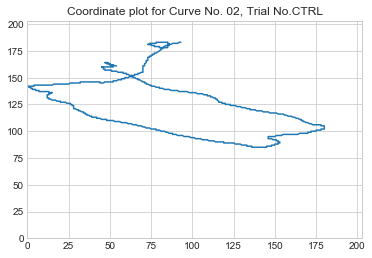

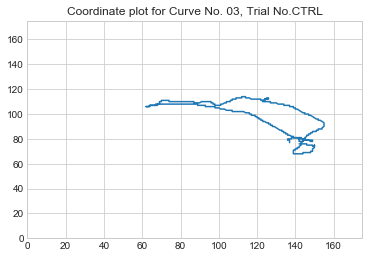

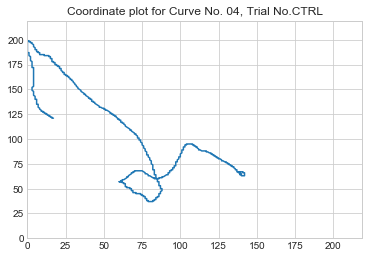

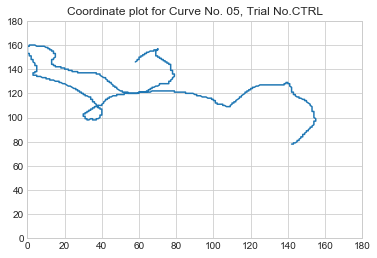

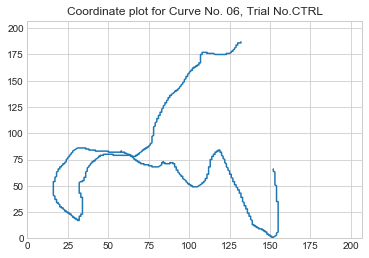

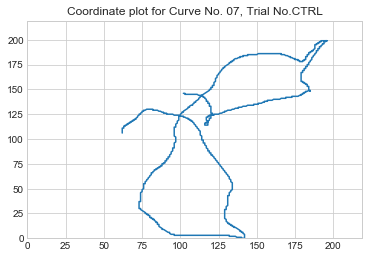

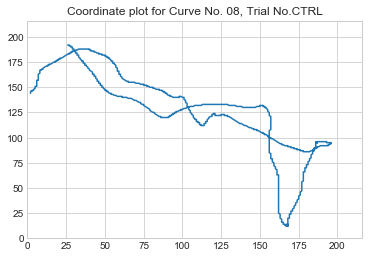

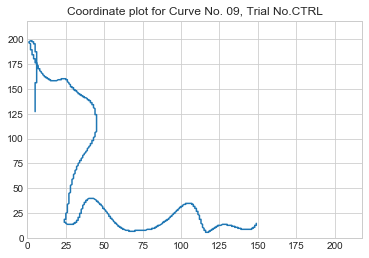

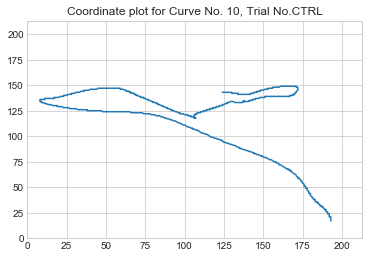

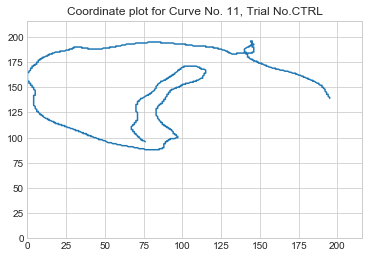

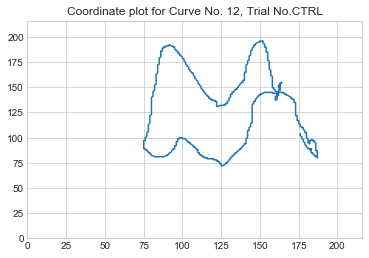

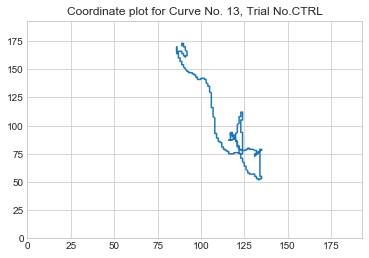

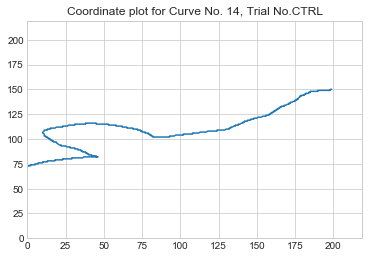

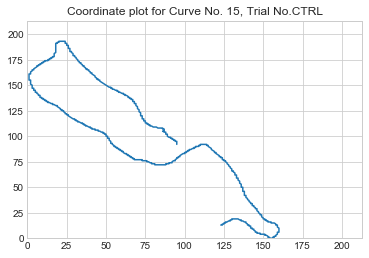

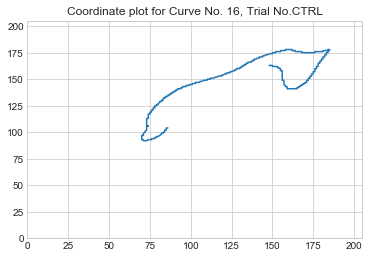

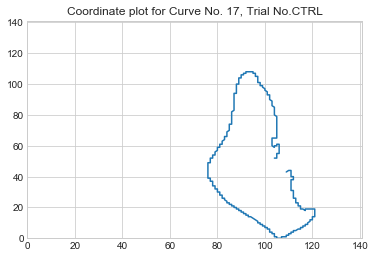

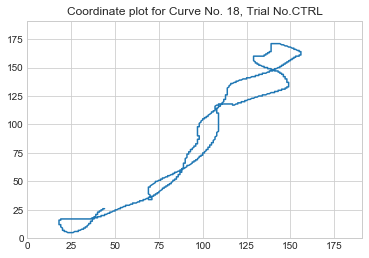

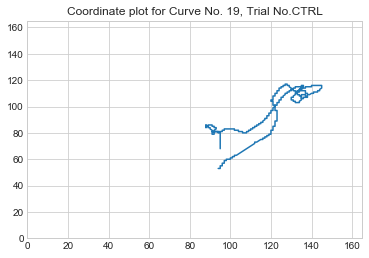

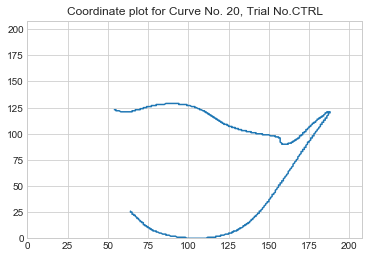

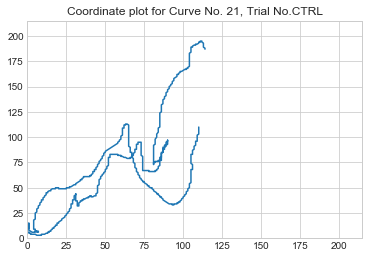

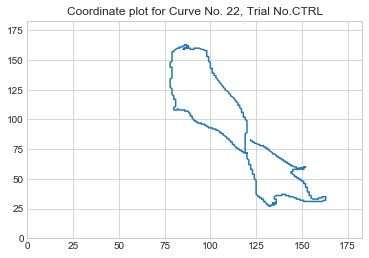

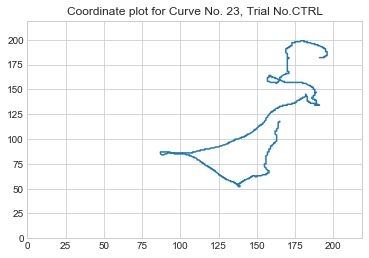

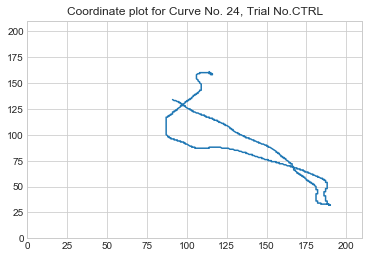

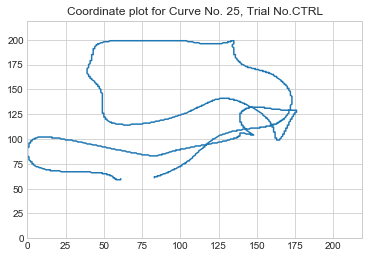

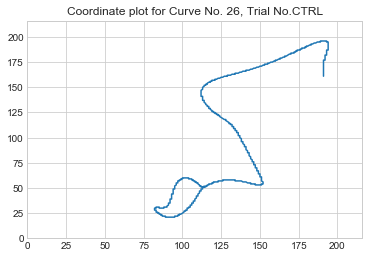

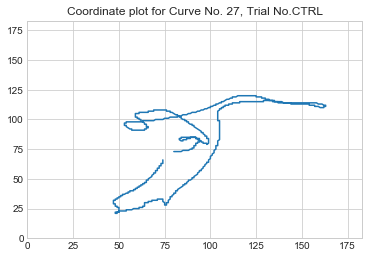

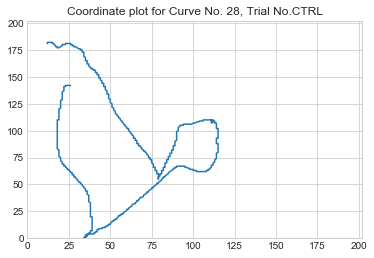

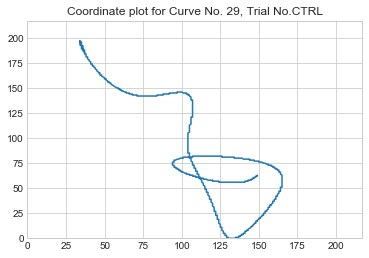

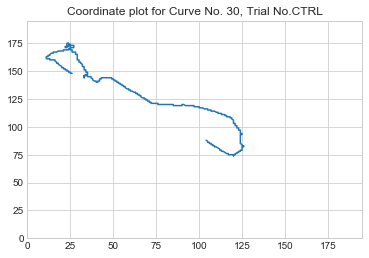

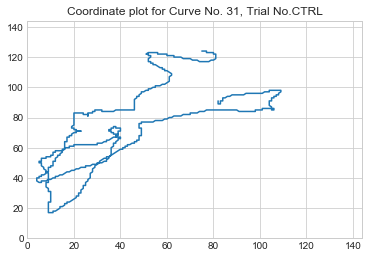

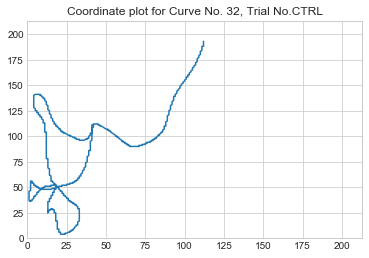

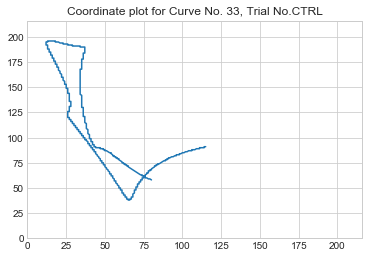

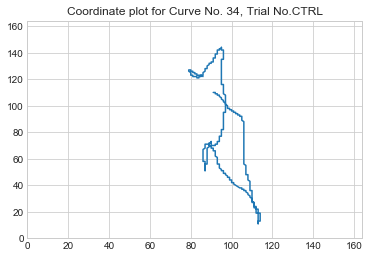

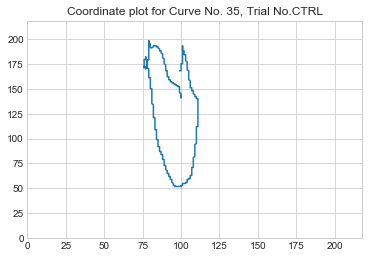

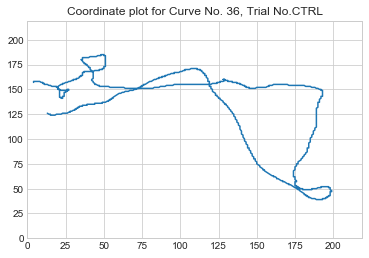

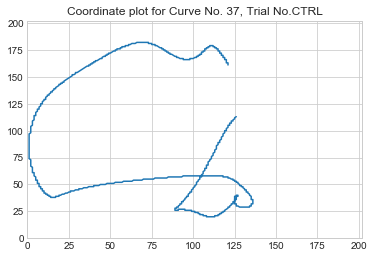

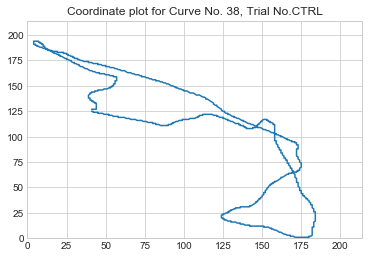

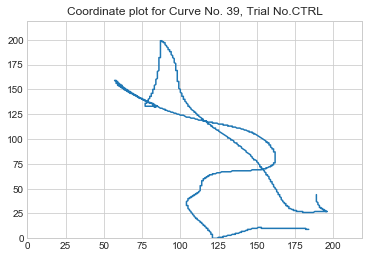

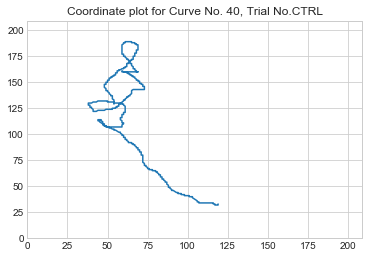

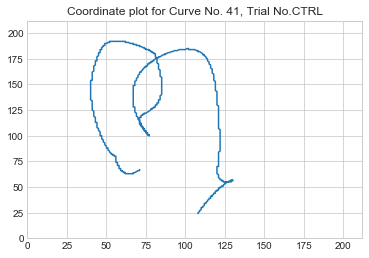

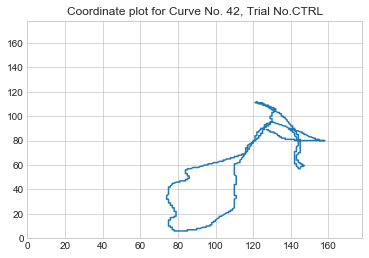

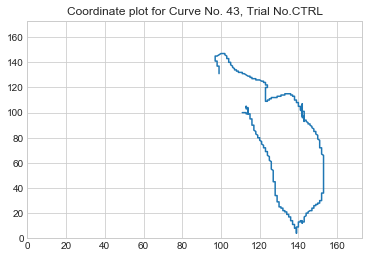

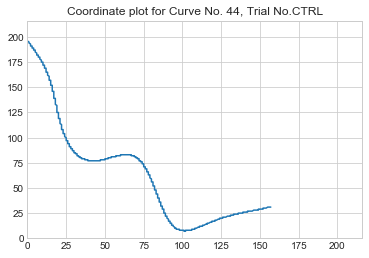

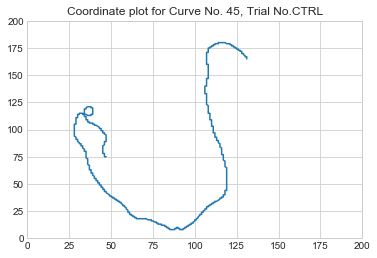

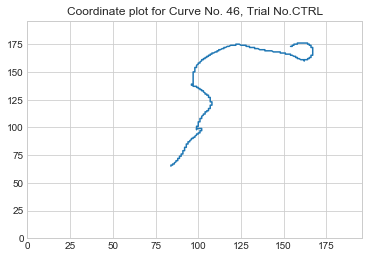

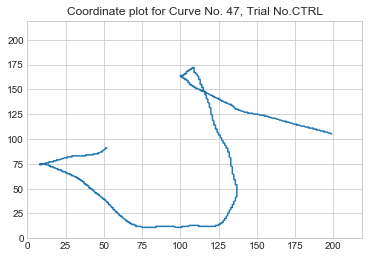

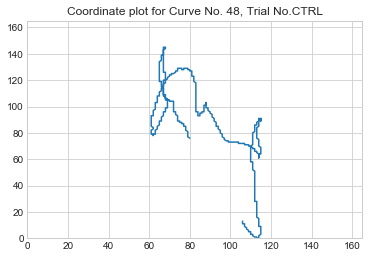

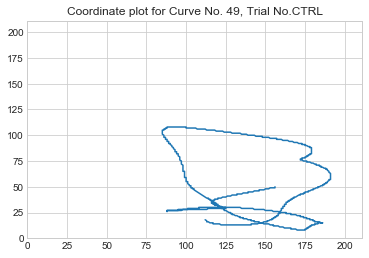

In [19]:
for i in range(50):
    c = '%02d' % i
    curvePlot('FR_test_higher', 'FR', c, 'CTRL')

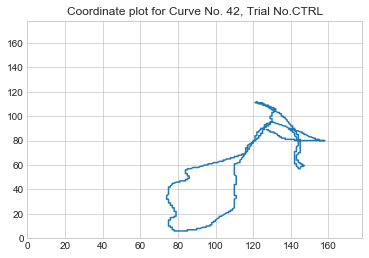

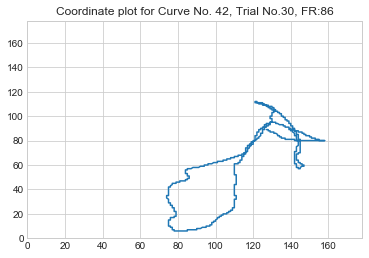

In [46]:
curvePlot('FR_test_higher', 'FR', '42', 'CTRL')
curvePlot('FR_test_higher', 'FR', '42', '30')

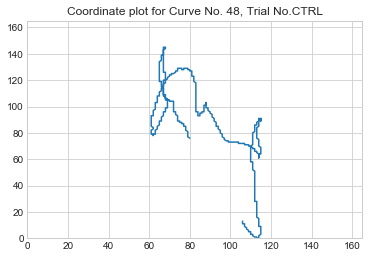

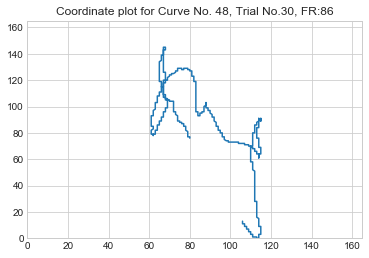

In [21]:
curvePlot('FR_test_higher', 'FR', '48', 'CTRL')
curvePlot('FR_test_higher', 'FR', '48', '30')

In [44]:
def curveScatterPlot(folder, var, curve_no, trial):
    #curve_no and trial must be double-digit strings (also trial can be = "CTRL")
    name_of_dat = 'CRV_'+curve_no+'_TEST_' + trial +'.dat'
    path_to_dat = user_path +folder+'/'+name_of_dat
    data = pd.read_csv(path_to_dat)
    x = data.X
    y = data.Y
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    ax.scatter(x, y, color='r', s = 0.1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    if trial == "CTRL":
        ax.set_title("Coordinate plot for Curve No. " + curve_no + ', Trial No.' + trial)
    else:
        trial_int = int(trial)
        tests = trial_dict[folder]
        trial_value = tests[trial_int]
        ax.set_title("Coordinate plot for Curve No. " + curve_no + ', Trial No.' + trial + ', ' + var +':'+str(trial_value))
    plt.show()

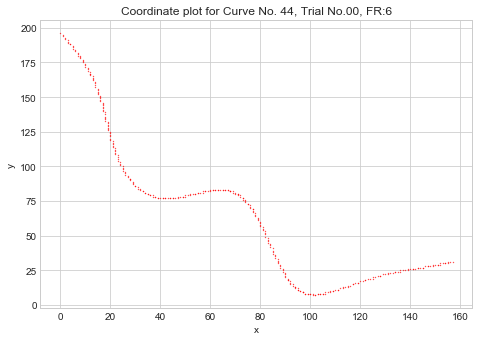

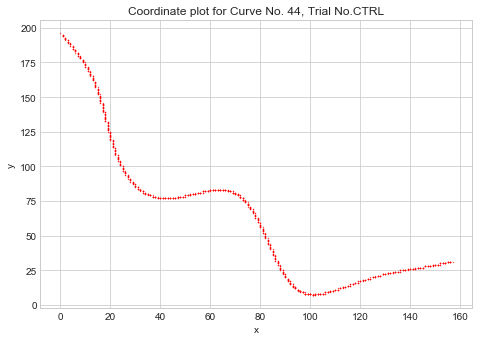

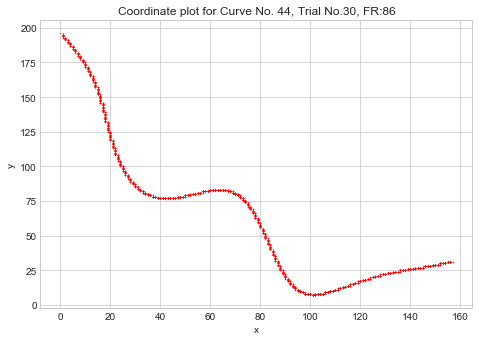

In [45]:
curveScatterPlot('FR_test_lower', 'FR', '44', '00')
curveScatterPlot('FR_test_higher', 'FR', '44', 'CTRL')
curveScatterPlot('FR_test_higher', 'FR', '44', '30')